# Bibliotecas

In [36]:
## Pandas
import pandas as pd
import numpy as np
import seaborn as sns # Alternativa pra gerar gráficos
from sklearn.cluster import KMeans ## Agrupamento pela média das variáveis
import matplotlib.pyplot as plot
from sklearn.preprocessing import OrdinalEncoder # codificar variaveis categoricas
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler # Padronizar dados
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold ### funcionalidadde para separar os dados em treino e teste

from dfply import *
import joblib ## Salvar modelo como pickle
from sklearn.impute import SimpleImputer # imputação simples
from math import sqrt
import random # semente

##Visualização data frame pandas sem truncamento
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
#pd.set_option('display.max_colwidth', None)

# permite a vizualição de números flutuantes com duas casas decimais
pd.set_option('display.float_format', '{:.2f}'.format)


np.random.seed(2025)
random.seed(2025)

In [37]:
# df_select
df_select = pd.read_parquet("C:/Users/fernando.monteiro/deep-torch-example/KAB/Behavior_KAB/Desenvolvimento/df_select.parquet")

In [38]:
pd.set_option('display.max_columns', None)
df_select[df_select['cpf_cnpj']==3736997]

,cpf_cnpj,sexo,idade,estado_civil,grau_escolaridade,natureza_ocupacao,profissao,nacionalidade,uf_residencia,filial,tempo_relacionamento_kredilig_meses,tempo_inatividade_conta_cartao,tempo_inatividade_conta_carne,situacao_conta,motivo_situacao_conta,canal_origem,situacao_fatura,limite_total,limite_total_utilizado,data_ultima_alteracao_limite,media_meses_entre_contratos_combinado,media_meses_entre_contratos_reneg,qtd_contratos_regular,FINANCIAMENTO_atraso,EMPRESTIMO_atraso,RENEG_atraso,FINANCIAMENTO,EMPRESTIMO,RENEG,qtd_contratos_atraso,qtd_contratos_aberto_atraso,qtd_contratos_aberto_regular,qtd_contratos_fechado_atraso,qtd_contratos_fechado_regular,qtd_reneg_aberto_atraso,qtd_reneg_aberto_regular,qtd_reneg_fechado_atraso,qtd_reneg_fechado_regular,valor_da_parcela_aberto,principal_total_aberto,principal_total_fechado,qtd_parcelas_pagas,qtd_parcelas_aberta,creditos_a_vencer,creditos_vencidos,media_atraso_dias,inad_e_reneg,inad,RENEG_aberto,meses_ultimo_pagamento,meses_entre_primeiro_e_ultimo_pagamento,meses_entre_primeiro_e_ultimo_fechamento,tempo_ultimo_atraso_meses,valor_pago_nr,valor_principal_total_reneg,valor_principal_total_nr,FIN_valor_medio_entrada_nr,id_base,produtos_ativos,dias_maior_atraso,renda_valida_new,renda_comprometida,amortizacao,produtos,qtd_total_fechado_a_vista,mean_dias_maior_atraso,qtd_contratos,limite_total_primeiro_mes,limite_total_ultimo_mes,situacao_alteracao_limite,nivel_de_risco,fx_score,REGIAO_NOVO,dias_maior_atraso_aberto,data_reneg_aberto,qtd_contratos_nr,qtd_cartao_antecipacao,qtd_parcelas_pagas_nr
22315,3736997.00,M,58,UNIAO ESTAVEL,NaN,AUTONOMO SEM VINCULO EMPREGO,CATADOR DE MATERIAIS EM GERAL,BRASILEIRO,SC,69,59.00,13,13,Ativa,PAGTO,Fisico,L,13200.00,16784.28,NaT,1.95,2.52,25,0,0,0,1,1,1,0,0,10,0,10,0,0,0,5,2033.28,21544.01,15276.50,250,80,15847.20,0.00,4.00,NAO,NAO,0,0.00,41.00,40.00,NaN,40827.11,435.70,36384.81,0.00,base_carne/base_cartao,FINANCIAMENTO,36,1612.26,126.11,40391.41,EMPRESTIMO/FINANCIAMENTO,0,8.66,25,12000.00,13200.00,Aumentou,A5,"(744.0, 780.0]",Grande Florianópolis,0,NaT,20,NaN,245


In [39]:
df=df_select.copy()

In [40]:
df_fit=df.drop(columns=['profissao','uf_residencia','filial','tempo_inatividade_conta_cartao',
                                        'tempo_inatividade_conta_carne','motivo_situacao_conta', 'qtd_contratos_atraso','qtd_contratos_aberto_atraso',
                                        'qtd_contratos_fechado_atraso', 'qtd_reneg_aberto_atraso', 'qtd_reneg_fechado_atraso',
                                        'creditos_vencidos', 'tempo_ultimo_atraso_meses','valor_principal_total_reneg',
                                        'FINANCIAMENTO_atraso','EMPRESTIMO_atraso','RENEG_atraso',"nivel_de_risco","dias_maior_atraso_aberto",	"data_reneg_aberto","data_ultima_alteracao_limite"])

In [41]:
df_fit.columns.tolist()

['cpf_cnpj',
 'sexo',
 'idade',
 'estado_civil',
 'grau_escolaridade',
 'natureza_ocupacao',
 'nacionalidade',
 'tempo_relacionamento_kredilig_meses',
 'situacao_conta',
 'canal_origem',
 'situacao_fatura',
 'limite_total',
 'limite_total_utilizado',
 'media_meses_entre_contratos_combinado',
 'media_meses_entre_contratos_reneg',
 'qtd_contratos_regular',
 'FINANCIAMENTO',
 'EMPRESTIMO',
 'RENEG',
 'qtd_contratos_aberto_regular',
 'qtd_contratos_fechado_regular',
 'qtd_reneg_aberto_regular',
 'qtd_reneg_fechado_regular',
 'valor_da_parcela_aberto',
 'principal_total_aberto',
 'principal_total_fechado',
 'qtd_parcelas_pagas',
 'qtd_parcelas_aberta',
 'creditos_a_vencer',
 'media_atraso_dias',
 'inad_e_reneg',
 'inad',
 'RENEG_aberto',
 'meses_ultimo_pagamento',
 'meses_entre_primeiro_e_ultimo_pagamento',
 'meses_entre_primeiro_e_ultimo_fechamento',
 'valor_pago_nr',
 'valor_principal_total_nr',
 'FIN_valor_medio_entrada_nr',
 'id_base',
 'produtos_ativos',
 'dias_maior_atraso',
 'renda_v

In [42]:
df_fit.describe()

,cpf_cnpj,idade,tempo_relacionamento_kredilig_meses,limite_total,limite_total_utilizado,media_meses_entre_contratos_combinado,media_meses_entre_contratos_reneg,qtd_contratos_regular,FINANCIAMENTO,EMPRESTIMO,RENEG,qtd_contratos_aberto_regular,qtd_contratos_fechado_regular,qtd_reneg_aberto_regular,qtd_reneg_fechado_regular,valor_da_parcela_aberto,principal_total_aberto,principal_total_fechado,qtd_parcelas_pagas,qtd_parcelas_aberta,creditos_a_vencer,media_atraso_dias,RENEG_aberto,meses_ultimo_pagamento,meses_entre_primeiro_e_ultimo_pagamento,meses_entre_primeiro_e_ultimo_fechamento,valor_pago_nr,valor_principal_total_nr,FIN_valor_medio_entrada_nr,dias_maior_atraso,renda_valida_new,renda_comprometida,amortizacao,qtd_total_fechado_a_vista,mean_dias_maior_atraso,qtd_contratos,limite_total_primeiro_mes,limite_total_ultimo_mes,qtd_contratos_nr,qtd_cartao_antecipacao,qtd_parcelas_pagas_nr
count,357148.00,357148.00,357148.00,357148.00,357148.00,216826.00,64151.00,357148.00,357148.00,357148.00,357148.00,357148.00,357148.00,357148.00,357148.00,357148.00,357148.00,357148.00,357148.00,357148.00,357148.00,357148.00,357148.00,357148.00,357148.00,357148.00,357148.00,357148.00,325534.00,357148.00,355280.00,355280.00,357148.00,357148.00,355744.00,357148.00,349902.00,350599.00,357148.00,21846.00,357148.00
mean,33341134144.70,50.05,47.31,5267.52,1769.29,6.24,6.22,3.60,0.87,0.48,0.33,0.86,1.98,0.10,0.65,249.22,2740.73,3981.70,36.06,15.73,2107.03,32.41,0.14,8.23,18.21,26.37,5325.58,5202.79,43.55,91.38,2117.63,12.74,3805.95,0.15,7.56,4.48,6241.14,7334.99,3.44,3.21,29.86
std,32062311751.26,16.30,32.63,6060.62,3739.39,5.47,6.41,5.20,0.34,0.50,0.47,1.49,3.33,0.50,2.16,328.21,3766.78,7114.79,51.81,23.98,3784.29,92.60,0.35,10.62,13.40,12.45,7453.41,6494.41,215.33,193.26,824.30,17.57,8162.79,1.42,9.89,5.53,4620.08,5556.22,4.25,3.63,41.54
min,1039938.00,18.00,0.00,0.00,-6467.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,508.20,0.00,-363199.57,0.00,0.00,1.00,8.00,100.00,0.00,1.00,0.00
25%,5347129206.50,37.00,20.00,0.00,0.00,2.71,1.91,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,119.00,7.00,0.00,0.00,0.45,0.00,1.00,6.00,16.00,891.00,1384.59,0.00,1.00,1631.30,0.00,488.00,0.00,0.00,1.00,3000.00,3404.50,1.00,1.00,5.00
50%,13462373415.50,50.00,41.00,4200.00,0.00,4.78,4.08,2.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,166.00,1615.30,1904.98,18.00,8.00,492.00,3.56,0.00,2.00,16.00,29.00,2862.32,3159.18,0.00,12.00,1892.52,8.09,2234.90,0.00,3.07,3.00,5376.00,6375.00,2.00,2.00,16.00
75%,63102026702.00,63.00,72.00,8694.00,2064.00,8.03,8.18,4.00,1.00,1.00,1.00,1.00,3.00,0.00,0.00,347.00,3881.30,4938.46,44.00,21.00,2755.69,16.92,0.00,14.00,31.00,38.00,6918.91,6669.68,0.00,63.00,2226.00,17.38,5782.66,0.00,11.85,5.00,8112.00,9715.00,4.00,4.00,38.00
max,99997908953.00,100.00,126.00,100000.00,83391.92,41.30,41.47,181.00,1.00,1.00,1.00,34.00,126.00,17.00,117.00,15803.40,126712.99,363199.57,1410.00,630.00,83391.92,1200.00,1.00,42.00,42.00,42.00,310434.77,289360.52,12460.00,1223.00,30000.00,792.24,292185.39,122.00,60.00,181.00,80000.00,100000.00,145.00,51.00,1410.00


In [43]:
# Selecionando apenas colunas categóricas
colunas_categoricas = [
 'sexo',
 'estado_civil',
 'grau_escolaridade',
 'natureza_ocupacao',
 'nacionalidade',
 'situacao_conta',
 'canal_origem',
 'situacao_fatura',
 'FINANCIAMENTO',
 'EMPRESTIMO',
 'RENEG',
 'inad_e_reneg',
 'inad',
 'RENEG_aberto',
 'id_base',
 'produtos_ativos',
 'produtos',
 "situacao_alteracao_limite",
 "REGIAO_NOVO"]

# Criando tabelas de contingência para cada variável categórica
for col in colunas_categoricas:
    print(f"\nTabela de Frequência: {col}")
    tabela=df_fit[col].value_counts(dropna=False)
    print(tabela)


Tabela de Frequência: sexo
sexo
F    194860
M    161951
        337
Name: count, dtype: int64

Tabela de Frequência: estado_civil
estado_civil
CASADO           146229
SOLTEIRO         103433
UNIAO ESTAVEL     32961
NaN               25440
DIVORCIADO        25234
VIUVO             23851
Name: count, dtype: int64

Tabela de Frequência: grau_escolaridade
grau_escolaridade
ENSINO MEDIO 2º GRAU COM          218950
NaN                                47004
ENSINO FUNDAMENTA 1º GRAU COMP     27021
ENSINO FUNDAMENTAL 1º GRAU INC     24234
ENSINO MEDIO 2º GRAU INC           17974
SUPERIOR COMPLETO                  15125
SUPERIOR INCOMPLETO                 4773
CURSO TECNICO                       1196
SEM INSTRUCAO                        871
Name: count, dtype: int64

Tabela de Frequência: natureza_ocupacao
natureza_ocupacao
EMPREGADO SETOR PRIVADO,EXCETO INSTITUICAO FINANC    134432
AUTONOMO SEM VINCULO EMPREGO                         103887
APOSENTADO EMPRESA PRIVADA                           

# Estudo inadimplência vs tempo de relacionamento

In [44]:
tabela=pd.crosstab(pd.cut(df_fit.tempo_relacionamento_kredilig_meses, 
                                          bins=[-0.99,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,24,36,48,60,72,84,96,np.inf], 
                                          labels=["0","1", "2", "3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19 a 24","3 anos","4 anos","5 anos","6 anos","7 anos","8 anos", "+8 anos",]), df_fit["inad_e_reneg"],dropna=False)

In [45]:
col = "SIM"
serie = tabela[col]

In [46]:
# Calcular percentual acumulado
percentual_acumulado = (serie.cumsum() / (tabela[col].cumsum()+tabela["NAO"].cumsum())) * 100
print("\nPercentual acumulado:\n", percentual_acumulado)


Percentual acumulado:
 tempo_relacionamento_kredilig_meses
0          0.14
1          0.22
2          0.17
3          1.07
4          3.59
5          5.63
6          7.95
7          9.44
8         10.77
9         12.01
10        13.41
11        14.52
12        15.75
13        17.00
14        18.07
15        18.74
16        19.39
17        20.03
18        20.64
19 a 24   22.83
3 anos    25.19
4 anos    28.56
5 anos    29.16
6 anos    29.32
7 anos    28.94
8 anos    28.66
+8 anos   27.84
dtype: float64


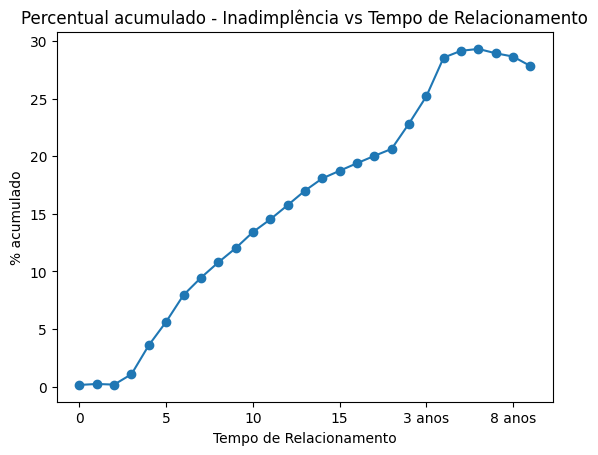

In [47]:
# Plotar gráfico
percentual_acumulado.plot(kind="line", marker="o", title=f"Percentual acumulado - Inadimplência vs Tempo de Relacionamento")
plot.ylabel("% acumulado")
plot.xlabel("Tempo de Relacionamento")
plot.show()

In [48]:
# categoria_relacionamento
df_fit["categoria_relacionamento"]= np.where(
    (df_fit["tempo_relacionamento_kredilig_meses"] < 12),
    "Recente", "Behavior")
df_fit["categoria_relacionamento"]=df_fit["categoria_relacionamento"].astype("category")

In [49]:
df_fit.categoria_relacionamento.value_counts(dropna=False)

categoria_relacionamento
Behavior    307588
Recente      49560
Name: count, dtype: int64

In [50]:
# Filtro por categoria de relacionamento
df_fit_behavior=df_fit[df_fit["categoria_relacionamento"]=="Behavior"].copy()
df_fit_recente=df_fit[df_fit["categoria_relacionamento"]=="Recente"].copy()
# Salvando os DataFrames filtrados
#df_fit_recente.to_excel("df_fit_recente.xlsx", index=False)

# Ocupação, Escolaridade e Regional

In [51]:
pd.crosstab(df_fit_behavior["natureza_ocupacao"], df_fit_behavior["inad_e_reneg"],dropna=False)

inad_e_reneg,NAO,SIM
natureza_ocupacao,,
APOSENTADO EMPRESA PRIVADA,43292,9752
APOSENTADO EMPRESA PUBLICA,3277,862
APOSENTADO EMPRESA PUBLICA ESTADUAL,1875,470
APOSENTADO EMPRESA PUBLICA FEDERAL,760,218
APOSENTADO EMPRESA PUBLICA MUNICIPAL,1509,399
"APOSENTADO MILITAR, MILITAR RESERVA OU REFORMADO",476,139
AUTONOMO SEM VINCULO EMPREGO,60217,28941
BENEFICIARIO DE PENSAO,2372,918
BOLSISTA,32,40


In [52]:
# Categorização 'natureza_ocupacao_cat'
mapeamento_ocupacao = {
    'APOSENTADO EMPRESA PUBLICA': 'APOSENTADO',
    'APOSENTADO EMPRESA PUBLICA ESTADUAL': 'APOSENTADO',
    'APOSENTADO EMPRESA PUBLICA FEDERAL': 'APOSENTADO',
    'APOSENTADO EMPRESA PUBLICA MUNICIPAL': 'APOSENTADO',
    'APOSENTADO MILITAR, MILITAR RESERVA OU REFORMADO': 'APOSENTADO',
    'APOSENTADO EMPRESA PRIVADA':'APOSENTADO',
    'PENSIONISTA DA PREVIDENCIA SOCIAL (INSS)': 'RENDA_PASSIVA_PENSAO',
    'BENEFICIARIO DE PENSAO': 'RENDA_PASSIVA_PENSAO',
    'LOCATARIO RENDA COM ALUGUEIS': 'RENDA_PASSIVA_PENSAO',
    'AUTONOMO SEM VINCULO EMPREGO': 'EMPREGADO_PRIVADO_AUTONOMO',#'AUTONOMO',
    'EMPREGADO SETOR PRIVADO,EXCETO INSTITUICAO FINANC': 'EMPREGADO_PRIVADO_AUTONOMO',#'EMPREGADO_PRIVADO',
    'EMPREGADO DE INSTITUICOES FINANCEIRAS PRIVADAS': 'EMPREGADO_PRIVADO_AUTONOMO',#'EMPREGADO_PRIVADO',
    'SERVIDOR PUBLICO ESTADUAL': 'SERVIDOR_PUBLICO',
    'SERVIDOR PUBLICO FEDERAL': 'SERVIDOR_PUBLICO',
    'SERVIDOR PUBLICO MUNICIPAL': 'SERVIDOR_PUBLICO',
    'PROFISSIONAL LIBERAL': 'OUTROS',#'PROFISSIONAL_LIBERAL',
    'EMPRESARIO PROPRIETARIO OU FIRMA INDIVIDUAL': 'OUTROS',#'EMPREENDEDOR',
    'MICROEMPRESARIO/MICROEMPREENDEDOR INDIVIDUAL(MEI)': 'OUTROS',#'EMPREENDEDOR',
    'BOLSISTA': 'OUTROS',#'SEM_OCUPACAO_FORMAL',
    'DO LAR': 'OUTROS',#'SEM_OCUPACAO_FORMAL',
    'ESTUDANTE': 'OUTROS',# 'SEM_OCUPACAO_FORMAL',
    'NATUREZA OCUPACAO NAO ESPECIFICADA ANTERIORMENTE': 'OUTROS'
}

# Criação da nova coluna com a categoria
df_fit_behavior['ocupacao'] = df_fit_behavior['natureza_ocupacao'].map(mapeamento_ocupacao)
df_fit_behavior["ocupacao"]=df_fit_behavior["ocupacao"].astype("category")

In [53]:
pd.crosstab(df_fit_behavior["ocupacao"], df_fit_behavior["inad_e_reneg"],dropna=False)

inad_e_reneg,NAO,SIM
ocupacao,,
APOSENTADO,51189,11840
EMPREGADO_PRIVADO_AUTONOMO,138958,69467
OUTROS,3848,3187
RENDA_PASSIVA_PENSAO,11507,3910
SERVIDOR_PUBLICO,9860,3822


In [54]:
# Teste Qui-quadrado de independência - Utilizar para imputar por grupo de natureza da ocupação
from scipy.stats import chi2_contingency
# 1. Criar tabela de contingência
contingencia = pd.crosstab(df_fit_behavior["estado_civil"], df_fit_behavior["natureza_ocupacao"]) # estado_civil, grau_escolaridade

# 2. Rodar teste qui-quadrado
chi2, p, dof, expected = chi2_contingency(contingencia)

print("\nResultado do teste de Qui-quadrado:")
print("Qui² =", chi2)
print("Graus de liberdade =", dof)
print("p-valor =", p)


Resultado do teste de Qui-quadrado:
Qui² = 78427.52575277901
Graus de liberdade = 84
p-valor = 0.0


In [55]:
pd.crosstab(df_fit_behavior["grau_escolaridade"], df_fit_behavior["inad_e_reneg"],dropna=False)

inad_e_reneg,NAO,SIM
grau_escolaridade,,
NaN,20478,15345
CURSO TECNICO,690,297
ENSINO FUNDAMENTA 1º GRAU COMP,17737,6417
ENSINO FUNDAMENTAL 1º GRAU INC,15799,5962
ENSINO MEDIO 2º GRAU COM,137297,54494
ENSINO MEDIO 2º GRAU INC,10543,4834
SEM INSTRUCAO,509,239
SUPERIOR COMPLETO,9695,3307
SUPERIOR INCOMPLETO,2614,1331


In [56]:
# Categorização 'Escolaridade'
condicoes = [
    df_fit_behavior["grau_escolaridade"].isin(["SEM INSTRUCAO","ENSINO FUNDAMENTA 1º GRAU COMP", "ENSINO FUNDAMENTAL 1º GRAU INC"]),
    df_fit_behavior["grau_escolaridade"].isin(["ENSINO MEDIO 2º GRAU COM", "ENSINO MEDIO 2º GRAU INC"]),
    df_fit_behavior["grau_escolaridade"].isin(["CURSO TECNICO","SUPERIOR COMPLETO", "SUPERIOR INCOMPLETO"]),
]

Esc = ["ATE_FUNDAMENTAL", "ENSINO_MEDIO","TECNICO_SUPERIOR"]
df_fit_behavior["grau_escolaridade_cat"] = np.select(condicoes, Esc,default=None)
df_fit_behavior["grau_escolaridade_cat"]=df_fit_behavior["grau_escolaridade_cat"].astype("category")
df_fit_behavior.drop(columns="grau_escolaridade", inplace=True)

In [57]:
pd.crosstab(df_fit_behavior["grau_escolaridade_cat"], df_fit_behavior["inad_e_reneg"],dropna=False)

inad_e_reneg,NAO,SIM
grau_escolaridade_cat,,
NaN,20478,15345
ATE_FUNDAMENTAL,34045,12618
ENSINO_MEDIO,147840,59328
TECNICO_SUPERIOR,12999,4935


In [58]:
# Categorização 'REGIAO'
mapeamento_regiao = {
"Grande Florianópolis": "Grande_Florianópolis",
"Norte Catarinense":"Norte_Catarinense",
"Norte_Centro": "Fora_SC",
"Oeste Catarinense": "Oeste_Catarinense",
"Serrana":"Serrana",
"Sudeste":"Fora_SC",
"Sul":"Fora_SC",
"Sul Catarinense":"Sul_Catarinense",
"Vale do Itajaí" :"Vale_do_Itajaí"
}

# Criação da nova coluna com a categoria
df_fit_behavior['regiao'] = df_fit_behavior['REGIAO_NOVO'].map(mapeamento_regiao)
df_fit_behavior["regiao"]=df_fit_behavior["regiao"].astype("category")

# Pré-Processamento

## Imputação

In [59]:
df_fit_behavior.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307588 entries, 1 to 548590
Data columns (total 60 columns):
 #   Column                                    Non-Null Count   Dtype   
---  ------                                    --------------   -----   
 0   cpf_cnpj                                  307588 non-null  float64 
 1   sexo                                      307588 non-null  category
 2   idade                                     307588 non-null  int64   
 3   estado_civil                              288661 non-null  category
 4   natureza_ocupacao                         307588 non-null  category
 5   nacionalidade                             307575 non-null  category
 6   tempo_relacionamento_kredilig_meses       307588 non-null  float64 
 7   situacao_conta                            307588 non-null  category
 8   canal_origem                              307588 non-null  category
 9   situacao_fatura                           240145 non-null  category
 10  limite_total 

In [60]:
# Porcentagem de valores faltantes
(df_fit_behavior.isnull().sum()).sort_values(ascending=False)

qtd_cartao_antecipacao                      286272
media_meses_entre_contratos_reneg           243974
media_meses_entre_contratos_combinado       105206
situacao_fatura                              67443
grau_escolaridade_cat                        35823
FIN_valor_medio_entrada_nr                   30266
estado_civil                                 18927
limite_total_ultimo_mes                       3442
renda_valida_new                              1861
renda_comprometida                            1861
mean_dias_maior_atraso                        1338
limite_total_primeiro_mes                     1253
nacionalidade                                   13
limite_total                                     0
qtd_contratos_regular                            0
FINANCIAMENTO                                    0
EMPRESTIMO                                       0
RENEG                                            0
qtd_contratos_aberto_regular                     0
qtd_contratos_fechado_regular  

In [61]:
# Variável auxiliar para media_meses_entre_contratos_combinado
cond1 = [
    df_fit_behavior["media_meses_entre_contratos_combinado"] == 0,
    df_fit_behavior["media_meses_entre_contratos_combinado"].isna(),
    df_fit_behavior["media_meses_entre_contratos_combinado"] > 0
]

class1 = [
    "Contratos_mesmo_dia",
    "Apenas_1_contrato",
    "Contratos_dias_diferentes"
]

df_fit_behavior["tipo_cal_entre_contratos"] = np.select(cond1, class1, default="sem_classificacao")
df_fit_behavior["tipo_cal_entre_contratos"]=df_fit_behavior["tipo_cal_entre_contratos"].astype("category")

# Variável auxiliar para media_meses_entre_contratos_reneg
cond2 = [
    df_fit_behavior["media_meses_entre_contratos_reneg"] == 0,
    df_fit_behavior["media_meses_entre_contratos_reneg"].isna(),
    df_fit_behavior["media_meses_entre_contratos_reneg"] > 0
]

class2 = [
    "Contratos_mesmo_dia",
    "Apenas_1_contrato",
    "Contratos_dias_diferentes"
]

df_fit_behavior["tipo_cal_entre_contratos_reneg"] = np.select(cond2, class2, default="sem_classificacao")
df_fit_behavior["tipo_cal_entre_contratos_reneg"]=df_fit_behavior["tipo_cal_entre_contratos_reneg"].astype("category")

# Variável auxiliar para FIN_valor_medio_entrada_nr
cond3 = [
    df_fit_behavior["FIN_valor_medio_entrada_nr"] == 0,
    df_fit_behavior["FIN_valor_medio_entrada_nr"].isna(),
    df_fit_behavior["FIN_valor_medio_entrada_nr"] > 0
]

class3 = [
    "N_Paga_entrada",
    "N_Paga_entrada",
    "Paga_entrada"
]

df_fit_behavior["tipo_valor_entrada"] = np.select(cond3, class3, default="sem_classificacao")
df_fit_behavior["tipo_valor_entrada"]=df_fit_behavior["tipo_valor_entrada"].astype("category")

# Variável auxiliar para limite_total
df_fit_behavior["situacao_limite"] = np.where(
    (df_fit_behavior["limite_total"] > 0),
    "Possui_Limite", "N_possui_Limite"
)
df_fit_behavior["situacao_limite"]=df_fit_behavior["situacao_limite"].astype("category")

# Variável auxiliar para valor_da_parcela_aberto
df_fit_behavior["situacao_parcela_aberto"] = np.where(
    (df_fit_behavior["valor_da_parcela_aberto"] == 0),
    "N_possui_parcela_aberto","Possui_parcela_aberto"
)
df_fit_behavior["situacao_parcela_aberto"]=df_fit_behavior["situacao_parcela_aberto"].astype("category")

# Variável auxiliar para mean_dias_maior_atraso
cond4 = [
    df_fit_behavior["mean_dias_maior_atraso"].isna(),
    df_fit_behavior["mean_dias_maior_atraso"] >= 0
]

class4 = [
    "NAO",
    "SIM"]

df_fit_behavior["mean_atraso_possui_info"] = np.select(cond4, class4, default="sem_classificacao")
df_fit_behavior["mean_atraso_possui_info"]=df_fit_behavior["mean_atraso_possui_info"].astype("category")


# possui_contratos_a_vista
cond5 = [
    ((df_fit_behavior["qtd_total_fechado_a_vista"] == 0) & (df_fit_behavior["id_base"] == "base_carne")),
    ((df_fit_behavior["qtd_total_fechado_a_vista"] == 0) & (df_fit_behavior["id_base"] == "base_cartao")),
    ((df_fit_behavior["qtd_total_fechado_a_vista"] == 0) & (df_fit_behavior["id_base"] == "base_carne/base_cartao")),
    df_fit_behavior["qtd_total_fechado_a_vista"] > 0
]

class5 = [
    "N_base_CARTAO",
    "NAO",
    "NAO",
    "SIM"
]

df_fit_behavior["possui_contratos_a_vista"] = np.select(cond5, class5, default="sem_classificacao")
df_fit_behavior["possui_contratos_a_vista"]=df_fit_behavior["possui_contratos_a_vista"].astype("category")

# possui_antecipacao qtd_cartao_antecipacao
# Variável auxiliar para FIN_valor_medio_entrada_nr
cond6 = [
    df_fit_behavior["qtd_cartao_antecipacao"] == 0,
    df_fit_behavior["qtd_cartao_antecipacao"].isna(),
    df_fit_behavior["qtd_cartao_antecipacao"] > 0
]

class6 = [
    "NAO",
    "NAO",
    "SIM"
]

df_fit_behavior["possui_antecipacao"] = np.select(cond6, class6, default="sem_classificacao")
df_fit_behavior["possui_antecipacao"]=df_fit_behavior["possui_antecipacao"].astype("category")

# principal total
df_fit_behavior["principal_total"]=df_fit_behavior["principal_total_fechado"]+df_fit_behavior["principal_total_aberto"]

## Imputação nulos
df_fit_behavior["media_meses_entre_contratos_combinado"] = df_fit_behavior["media_meses_entre_contratos_combinado"].fillna(0)
df_fit_behavior["media_meses_entre_contratos_reneg"] = df_fit_behavior["media_meses_entre_contratos_reneg"].fillna(0)
df_fit_behavior["FIN_valor_medio_entrada_nr"] = df_fit_behavior["FIN_valor_medio_entrada_nr"].fillna(0)
df_fit_behavior["qtd_cartao_antecipacao"] = df_fit_behavior["qtd_cartao_antecipacao"].fillna(0)
df_fit_behavior["situacao_fatura"] = df_fit_behavior["situacao_fatura"].cat.add_categories("VAZIO")
df_fit_behavior["situacao_fatura"] = df_fit_behavior["situacao_fatura"].fillna("VAZIO")
df_fit_behavior["mean_dias_maior_atraso"] = df_fit_behavior["mean_dias_maior_atraso"].fillna(0)
df_fit_behavior["renda_comprometida"] = np.where(
    (df_fit_behavior["renda_valida_new"] == 0) | (df_fit_behavior["valor_da_parcela_aberto"] == 0),
    0, df_fit_behavior["renda_comprometida"]
)

In [62]:
# Porcentagem de valores faltantes
(df_fit_behavior.isnull().sum()).sort_values(ascending=False)

grau_escolaridade_cat        35823
estado_civil                 18927
limite_total_ultimo_mes       3442
renda_valida_new              1861
limite_total_primeiro_mes     1253
                             ...  
situacao_parcela_aberto          0
mean_atraso_possui_info          0
possui_contratos_a_vista         0
possui_antecipacao               0
principal_total                  0
Length: 69, dtype: int64

In [63]:
#df_fit_behavior[["principal_total","principal_total_aberto","principal_total_fechado","valor_pago_nr"]].describe()

In [64]:
df_fit_behavior[df_fit_behavior["principal_total"]<10].head()

,cpf_cnpj,sexo,idade,estado_civil,natureza_ocupacao,nacionalidade,tempo_relacionamento_kredilig_meses,situacao_conta,canal_origem,situacao_fatura,limite_total,limite_total_utilizado,media_meses_entre_contratos_combinado,media_meses_entre_contratos_reneg,qtd_contratos_regular,FINANCIAMENTO,EMPRESTIMO,RENEG,qtd_contratos_aberto_regular,qtd_contratos_fechado_regular,qtd_reneg_aberto_regular,qtd_reneg_fechado_regular,valor_da_parcela_aberto,principal_total_aberto,principal_total_fechado,qtd_parcelas_pagas,qtd_parcelas_aberta,creditos_a_vencer,media_atraso_dias,inad_e_reneg,inad,RENEG_aberto,meses_ultimo_pagamento,meses_entre_primeiro_e_ultimo_pagamento,meses_entre_primeiro_e_ultimo_fechamento,valor_pago_nr,valor_principal_total_nr,FIN_valor_medio_entrada_nr,id_base,produtos_ativos,dias_maior_atraso,renda_valida_new,renda_comprometida,amortizacao,produtos,qtd_total_fechado_a_vista,mean_dias_maior_atraso,qtd_contratos,limite_total_primeiro_mes,limite_total_ultimo_mes,situacao_alteracao_limite,fx_score,REGIAO_NOVO,qtd_contratos_nr,qtd_cartao_antecipacao,qtd_parcelas_pagas_nr,categoria_relacionamento,ocupacao,grau_escolaridade_cat,regiao,tipo_cal_entre_contratos,tipo_cal_entre_contratos_reneg,tipo_valor_entrada,situacao_limite,situacao_parcela_aberto,mean_atraso_possui_info,possui_contratos_a_vista,possui_antecipacao,principal_total
3400,65340469972.00,M,57,CASADO,AUTONOMO SEM VINCULO EMPREGO,BRASILEIRO,45.00,Bloqueada,Fisico,L,0.00,0.00,0.00,0.00,1,0,1,1,0,0,0,1,0.00,0.00,3.41,1,0,0.00,0.00,NAO,NAO,0,25.00,0.00,25.00,0.00,0.00,0.00,base_cartao,NENHUM,0,2278.14,0.00,-3.41,EMPRESTIMO,0,0.00,1,9600.00,9600.00,Manteve,"(895.0, 916.0]",Sul Catarinense,0,1.00,0,Behavior,EMPREGADO_PRIVADO_AUTONOMO,ENSINO_MEDIO,Sul_Catarinense,Apenas_1_contrato,Apenas_1_contrato,N_Paga_entrada,N_possui_Limite,N_possui_parcela_aberto,SIM,NAO,SIM,3.41
6098,92019706920.00,M,52,CASADO,AUTONOMO SEM VINCULO EMPREGO,BRASILEIRO,80.00,Bloqueada,Fisico,L,0.00,0.00,0.00,0.00,1,0,1,1,0,0,0,1,0.00,0.00,0.01,1,0,0.00,0.00,NAO,NAO,0,17.00,0.00,17.00,0.00,0.00,0.00,base_cartao,NENHUM,0,1892.52,0.00,-0.01,EMPRESTIMO,0,0.00,1,2860.00,2860.00,Manteve,"(871.0, 895.0]",Vale do Itajaí,0,1.00,0,Behavior,EMPREGADO_PRIVADO_AUTONOMO,ENSINO_MEDIO,Vale_do_Itajaí,Apenas_1_contrato,Apenas_1_contrato,N_Paga_entrada,N_possui_Limite,N_possui_parcela_aberto,SIM,NAO,SIM,0.01
6854,85733660953.00,M,55,CASADO,SERVIDOR PUBLICO MUNICIPAL,BRASILEIRO,92.00,Bloqueada,Fisico,L,0.00,0.00,0.00,0.00,1,0,1,1,0,0,0,1,0.00,0.00,0.07,1,0,0.00,0.00,NAO,NAO,0,17.00,0.00,17.00,0.00,0.00,0.00,base_cartao,NENHUM,0,1646.50,0.00,-0.07,EMPRESTIMO,0,0.00,1,2450.00,2450.00,Manteve,"(811.0, 842.0]",Vale do Itajaí,0,1.00,0,Behavior,SERVIDOR_PUBLICO,ENSINO_MEDIO,Vale_do_Itajaí,Apenas_1_contrato,Apenas_1_contrato,N_Paga_entrada,N_possui_Limite,N_possui_parcela_aberto,SIM,NAO,SIM,0.07
9079,7233179921.00,F,35,DIVORCIADO,"EMPREGADO SETOR PRIVADO,EXCETO INSTITUICAO FINANC",BRASILEIRO,90.00,Cancelada,Fisico,L,0.00,0.00,0.00,0.00,1,0,1,1,0,0,0,1,0.00,0.00,7.32,1,0,0.00,0.00,NAO,NAO,0,29.00,0.00,29.00,0.00,0.00,0.00,base_cartao,NENHUM,0,2542.96,0.00,-7.32,EMPRESTIMO,0,0.00,1,11370.00,11370.00,Manteve,"(977.0, 983.0]",Norte Catarinense,0,1.00,0,Behavior,EMPREGADO_PRIVADO_AUTONOMO,ENSINO_MEDIO,Norte_Catarinense,Apenas_1_contrato,Apenas_1_contrato,N_Paga_entrada,N_possui_Limite,N_possui_parcela_aberto,SIM,NAO,SIM,7.32
9698,90827805934.00,F,51,SOLTEIRO,AUTONOMO SEM VINCULO EMPREGO,BRASILEIRO,73.00,Bloqueada,Fisico,L,0.00,0.00,0.00,0.00,1,0,1,1,0,0,0,1,0.00,0.00,5.27,1,0,0.00,0.00,NAO,NAO,0,10.00,0.00,10.00,0.00,0.00,0.00,base_cartao,NENHUM,0,1833.70,0.00,-5.27,EMPRESTIMO,0,0.00,1,7000.00,7000.00,Manteve,"(780.0, 811.0]",Vale do Itajaí,0,1.00,0,Behavior,EMPREGADO_PRIVADO_AUTONOMO,ENSINO_MEDIO,Vale_do_Itajaí,Apenas_1_contrato,Apenas_1_contrato,N_Paga_entrada,N_possui_Limite,N_possui_parcela_aberto,SIM,NAO,SIM,5.27


In [65]:
df_fit_behavior.possui_antecipacao.value_counts()

possui_antecipacao
NAO    286272
SIM     21316
Name: count, dtype: int64

In [31]:
#df_fit_behavior[["qtd_total_fechado_a_vista","possui_contratos_a_vista","id_base"]].sample(20)

In [32]:
#df_fit_behavior[["FIN_valor_medio_entrada_nr","produtos","tipo_valor_entrada"]].sample(20)

In [33]:
#df_fit_behavior[df_cluster["renda_valida_new"].isnull()][["valor_da_parcela_aberto","renda_valida_new", "situacao_renda", "renda_comprometida","situacao_parcela_aberto"]].sample(5)

## Amostragem

In [66]:
# variável target em numérica
df_fit_behavior['inad_e_reneg'] = df_fit_behavior['inad_e_reneg'].map({'SIM': 1, 'NAO': 0})
df_fit_behavior['inad_e_reneg'] = df_fit_behavior['inad_e_reneg'].astype(int)
# Frequência da variável target
df_fit_behavior.inad_e_reneg.value_counts()

inad_e_reneg
0    215362
1     92226
Name: count, dtype: int64

In [67]:
# Amostragem
#Variável de interesse
outcome = df_fit_behavior >> select(X.inad_e_reneg)

# Remover a variável resposta do conjunto de dados
df_fit_behavior.drop(['inad_e_reneg'],axis=1, inplace=True)


# Separação em teste e treino
## Definindo treino e teste
X_train, X_test, y_train, y_test=train_test_split(df_fit_behavior,outcome, test_size=0.3, random_state=2025)

print(X_train.shape) #qtd treino
print(X_test.shape) #qtd teste

(215311, 68)
(92277, 68)


In [68]:
# Frequência da variável target no treino e teste
print(y_train.value_counts()) #qtd treino
print(y_test.value_counts()) #qtd teste

inad_e_reneg
0               150674
1                64637
Name: count, dtype: int64
inad_e_reneg
0               64688
1               27589
Name: count, dtype: int64


In [69]:
ids_train = X_train["cpf_cnpj"]  
X_train = X_train.drop(columns=["cpf_cnpj"])
ids_test = X_test["cpf_cnpj"]  
X_test = X_test.drop(columns=["cpf_cnpj"])

## Base de treino - Imputação

In [70]:
## Pré processamento - Imputação
X_train["sexo"] = X_train["sexo"].str.strip().replace("", np.nan).astype("category")

# Moda por grupo
moda_grau_escolaridade_cat = (
    X_train
    .groupby("natureza_ocupacao", observed=True)["grau_escolaridade_cat"]
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
)

moda_estado_civil = (
    X_train
    .groupby("natureza_ocupacao", observed=True)["estado_civil"]
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
)

# Criar Series com os valores imputados
valores_grau_escolaridade_cat = X_train["natureza_ocupacao"].map(moda_grau_escolaridade_cat)
valores_estado_civil = X_train["natureza_ocupacao"].map(moda_estado_civil)

# Imputar manualmente com .loc[]
X_train.loc[X_train["grau_escolaridade_cat"].isna(), "grau_escolaridade_cat"] = valores_grau_escolaridade_cat[X_train["grau_escolaridade_cat"].isna()]
X_train.loc[X_train["estado_civil"].isna(), "estado_civil"] = valores_estado_civil[X_train["estado_civil"].isna()]

## Imputação categórica moda geral
imputer_cat = SimpleImputer(strategy='most_frequent')

var_null_cat=["grau_escolaridade_cat","estado_civil","nacionalidade","sexo"]

X_train[var_null_cat] = X_train[var_null_cat].replace({None: np.nan})

X_train[var_null_cat] = pd.DataFrame(
    imputer_cat.fit_transform(X_train[var_null_cat]), # Aqui usa fit
    columns=var_null_cat,
    index=X_train.index)

## Imputação numérica por grupo

# Médias por grupo
medias_renda_valida = X_train.groupby("natureza_ocupacao", observed=True)["renda_valida_new"].mean()
medias_renda_comprometida = X_train.groupby("natureza_ocupacao", observed=True)["renda_comprometida"].mean()

# Mediana por grupo
medianas_renda_limite_total_ultimo_mes = X_train.groupby("fx_score", observed=True)["limite_total_ultimo_mes"].median()
medianas_renda_limite_total_primeiro_mes = X_train.groupby("fx_score", observed=True)["limite_total_primeiro_mes"].median()


# Criar Series com os valores imputados
valores_imputados_valida = X_train["natureza_ocupacao"].map(medias_renda_valida)
valores_imputados_comprometida = X_train["natureza_ocupacao"].map(medias_renda_comprometida)
valores_imputados_ultimo_mes = X_train["fx_score"].map(medianas_renda_limite_total_ultimo_mes)
valores_imputados_primeiro_mes = X_train["fx_score"].map(medianas_renda_limite_total_primeiro_mes)

# tipos
valores_imputados_valida=valores_imputados_valida.astype(float)
valores_imputados_comprometida=valores_imputados_comprometida.astype(float)
valores_imputados_ultimo_mes=valores_imputados_ultimo_mes.astype(float)
valores_imputados_primeiro_mes=valores_imputados_primeiro_mes.astype(float)

# Imputar manualmente com .loc[]
X_train.loc[X_train["renda_valida_new"].isna(), "renda_valida_new"] = valores_imputados_valida[X_train["renda_valida_new"].isna()]
X_train.loc[X_train["renda_comprometida"].isna(), "renda_comprometida"] = valores_imputados_comprometida[X_train["renda_comprometida"].isna()]
X_train.loc[X_train["limite_total_ultimo_mes"].isna(), "limite_total_ultimo_mes"] = valores_imputados_valida[X_train["limite_total_ultimo_mes"].isna()]

## Imputação numérica média geral
imputer_num = SimpleImputer(strategy='mean')

var_null_num=["renda_valida_new",'renda_comprometida']

X_train[var_null_num] = X_train[var_null_num].replace({None: np.nan})

X_train[var_null_num] = pd.DataFrame(
    imputer_num.fit_transform(X_train[var_null_num]),
    columns=var_null_num,
    index=X_train.index)

## Imputação numérica mediana geral
imputer_num_median = SimpleImputer(strategy='median')

var_null_num_median=["limite_total_ultimo_mes"]

X_train[var_null_num_median] = X_train[var_null_num_median].replace({None: np.nan})

X_train[var_null_num_median] = pd.DataFrame(
    imputer_num_median.fit_transform(X_train[var_null_num_median]),
    columns=var_null_num_median,
    index=X_train.index)

X_train.drop(columns=["natureza_ocupacao","fx_score"], inplace=True)

In [71]:
## Salvando os imputers como pickle
joblib.dump(imputer_cat, 'imputer_cat.pkl')
joblib.dump(imputer_num, 'imputer_num.pkl')
joblib.dump(imputer_num_median, 'imputer_num_median.pkl')

parametros = {
    "moda_grau_escolaridade_cat": moda_grau_escolaridade_cat,
    "moda_estado_civil": moda_estado_civil,
    "medias_renda_valida": medias_renda_valida,
    "medias_renda_comprometida": medias_renda_comprometida,
    "medianas_renda_limite_total_ultimo_mes": medianas_renda_limite_total_ultimo_mes,
}
joblib.dump(parametros, 'imputer_parametros.pkl')


['imputer_parametros.pkl']

In [37]:
#df_cluster_fit[["ocupacao","valor_da_parcela_aberto","renda_valida_new", "situacao_renda", "renda_comprometida","situacao_parcela_aberto"]].sample(5)

In [38]:
# conferindo imputação
colunas_categoricas = [
"sexo",
"estado_civil",
"grau_escolaridade_cat",
"nacionalidade",]

# Criando tabelas de contingência para cada variável categórica
for col in colunas_categoricas:
    print(f"\nTabela de Frequência: {col}")
    tabela=X_train[col].value_counts(dropna=False)
    print(tabela)
    
# Porcentagem de valores faltantes
(X_train.isnull().sum()).sort_values(ascending=False)


Tabela de Frequência: sexo
sexo
F    118681
M     96630
Name: count, dtype: int64

Tabela de Frequência: estado_civil
estado_civil
CASADO           103796
SOLTEIRO          58943
UNIAO ESTAVEL     20992
DIVORCIADO        16072
VIUVO             15508
Name: count, dtype: int64

Tabela de Frequência: grau_escolaridade_cat
grau_escolaridade_cat
ENSINO_MEDIO        169490
ATE_FUNDAMENTAL      32708
TECNICO_SUPERIOR     13113
Name: count, dtype: int64

Tabela de Frequência: nacionalidade
nacionalidade
BRASILEIRO     214074
ESTRANGEIRO      1237
Name: count, dtype: int64


sexo                                   0
idade                                  0
estado_civil                           0
nacionalidade                          0
tempo_relacionamento_kredilig_meses    0
                                      ..
situacao_parcela_aberto                0
mean_atraso_possui_info                0
possui_contratos_a_vista               0
possui_antecipacao                     0
principal_total                        0
Length: 65, dtype: int64

In [42]:
#X_train.limite_total_ultimo_mes.hist(bins=50, figsize=(20,15))
#plot.show()

In [39]:
X_train["situacao_alteracao_limite"] = np.select(
    [
        X_train["limite_total_primeiro_mes"] > X_train["limite_total_ultimo_mes"],   
        X_train["limite_total_primeiro_mes"] < X_train["limite_total_ultimo_mes"],   
        X_train["limite_total_primeiro_mes"] == X_train["limite_total_ultimo_mes"]  
    ],
    [
        "Diminuiu",    
        "Aumentou",      
        "Manteve"       
    ],
    default="Indefinido"
)
X_train["situacao_alteracao_limite"]=X_train["situacao_alteracao_limite"].astype("category")

In [40]:
X_train.situacao_alteracao_limite.value_counts(dropna=False)

situacao_alteracao_limite
Aumentou    107368
Manteve      81028
Diminuiu     26915
Name: count, dtype: int64

## Análise de Correlação e vazamento de informação

In [41]:
df_cpf_obj=X_train.copy()

In [42]:
df_cpf_obj["cpf_cnpj"]=ids_train
df_cpf_obj["inad_e_reneg"]=y_train["inad_e_reneg"]

In [43]:
df_cpf_obj

,sexo,idade,estado_civil,nacionalidade,tempo_relacionamento_kredilig_meses,situacao_conta,canal_origem,situacao_fatura,limite_total,limite_total_utilizado,media_meses_entre_contratos_combinado,media_meses_entre_contratos_reneg,qtd_contratos_regular,FINANCIAMENTO,EMPRESTIMO,RENEG,qtd_contratos_aberto_regular,qtd_contratos_fechado_regular,qtd_reneg_aberto_regular,qtd_reneg_fechado_regular,valor_da_parcela_aberto,principal_total_aberto,principal_total_fechado,qtd_parcelas_pagas,qtd_parcelas_aberta,creditos_a_vencer,media_atraso_dias,inad,RENEG_aberto,meses_ultimo_pagamento,meses_entre_primeiro_e_ultimo_pagamento,meses_entre_primeiro_e_ultimo_fechamento,valor_pago_nr,valor_principal_total_nr,FIN_valor_medio_entrada_nr,id_base,produtos_ativos,dias_maior_atraso,renda_valida_new,renda_comprometida,amortizacao,produtos,qtd_total_fechado_a_vista,mean_dias_maior_atraso,qtd_contratos,limite_total_primeiro_mes,limite_total_ultimo_mes,situacao_alteracao_limite,REGIAO_NOVO,qtd_contratos_nr,qtd_cartao_antecipacao,qtd_parcelas_pagas_nr,categoria_relacionamento,ocupacao,grau_escolaridade_cat,regiao,tipo_cal_entre_contratos,tipo_cal_entre_contratos_reneg,tipo_valor_entrada,situacao_limite,situacao_parcela_aberto,mean_atraso_possui_info,possui_contratos_a_vista,possui_antecipacao,principal_total,cpf_cnpj,inad_e_reneg
73203,F,50,CASADO,BRASILEIRO,91.00,Cancelada,Fisico,L,0.00,0.00,0.00,1.20,2,1,1,1,0,0,0,2,0.00,0.00,1432.03,5,0,0.00,2.50,NAO,0,23.00,3.00,26.00,0.00,0.00,0.00,base_carne/base_cartao,NENHUM,5,6300.00,0.00,-1432.03,EMPRESTIMO/FINANCIAMENTO,0,2.40,2,6750.00,6750.00,Manteve,Norte Catarinense,0,1.00,0,Behavior,SERVIDOR_PUBLICO,TECNICO_SUPERIOR,Norte_Catarinense,Apenas_1_contrato,Contratos_dias_diferentes,N_Paga_entrada,N_possui_Limite,N_possui_parcela_aberto,SIM,NAO,SIM,1432.03,84335335920.00,0
530133,F,59,SOLTEIRO,BRASILEIRO,19.00,Ativa,Fisico,VAZIO,1890.00,0.00,0.00,0.00,1,1,0,0,0,1,0,0,0.00,0.00,901.13,10,0,0.00,11.00,NAO,0,9.00,10.00,19.00,999.65,901.13,0.00,base_carne,NENHUM,11,1730.00,0.00,999.65,FINANCIAMENTO,0,6.95,1,1000.00,1890.00,Aumentou,Norte Catarinense,1,0.00,10,Behavior,EMPREGADO_PRIVADO_AUTONOMO,ENSINO_MEDIO,Norte_Catarinense,Apenas_1_contrato,Apenas_1_contrato,N_Paga_entrada,Possui_Limite,N_possui_parcela_aberto,SIM,N_base_CARTAO,NAO,901.13,2437977961.00,0
298257,F,71,CASADO,BRASILEIRO,99.00,Bloqueada,Fisico,A,0.00,0.00,1.75,0.00,4,1,1,1,0,3,0,1,1681.30,20074.65,4592.64,71,128,3511.55,58.25,SIM,0,21.00,17.00,38.00,15072.70,24422.77,0.00,base_carne/base_cartao,EMPRESTIMO/FINANCIAMENTO,591,1412.00,119.07,14828.18,EMPRESTIMO/FINANCIAMENTO,0,1.86,12,23100.00,25410.00,Aumentou,Sul Catarinense,11,0.00,70,Behavior,RENDA_PASSIVA_PENSAO,ENSINO_MEDIO,Sul_Catarinense,Contratos_dias_diferentes,Apenas_1_contrato,N_Paga_entrada,N_possui_Limite,Possui_parcela_aberto,SIM,NAO,NAO,24667.29,80042341949.00,1
94555,F,47,CASADO,BRASILEIRO,105.00,Cancelada,Fisico,L,0.00,0.00,0.00,0.00,1,1,0,0,0,1,0,0,0.00,0.00,330.14,6,0,0.00,0.00,NAO,0,33.00,8.00,42.00,492.00,330.14,0.00,base_cartao,NENHUM,0,1484.00,0.00,492.00,FINANCIAMENTO,0,0.00,1,8600.00,8600.00,Manteve,Sul Catarinense,1,0.00,6,Behavior,EMPREGADO_PRIVADO_AUTONOMO,ENSINO_MEDIO,Sul_Catarinense,Apenas_1_contrato,Apenas_1_contrato,N_Paga_entrada,N_possui_Limite,N_possui_parcela_aberto,SIM,NAO,NAO,330.14,2638764973.00,0
463900,F,41,UNIAO ESTAVEL,BRASILEIRO,78.00,Ativa,Fisico,L,10000.00,7037.00,2.10,1.15,35,1,1,1,3,16,0,16,595.00,8394.14,26072.21,219,33,6432.00,4.91,NAO,0,0.00,42.00,42.00,26515.33,26735.05,0.00,base_carne/base_cartao,FINANCIAMENTO,40,1730.00,34.39,18784.03,EMPRESTIMO/FINANCIAMENTO,0,11.72,35,10000.00,10000.00,Manteve,Norte Catarinense,19,0.00,194,Behavior,EMPREGADO_PRIVADO_AUTONOMO,ENSINO_MEDIO,Norte_Catarinense,Contratos_dias_diferentes,Contratos_dias_diferentes,N_Paga_entrada,Possui_Limite,Possui_parcela_aberto,SIM,NAO,NAO,34466.35,5649967938.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [44]:
import pandas as pd
from scipy.stats import chi2_contingency

tabelas_conting_inad = {}
variavel_alvo = 'inad_e_reneg'

colunas_categoricas = ['sexo',
 'estado_civil',
 'nacionalidade',
 'situacao_conta',
 'canal_origem',
 'situacao_fatura',
 'FINANCIAMENTO',
 'EMPRESTIMO',
 'RENEG',
 'inad',
 'RENEG_aberto',
 'id_base',
 'produtos_ativos',
 'produtos',
 'grau_escolaridade_cat',
 'ocupacao',
 'tipo_cal_entre_contratos',
 'tipo_cal_entre_contratos_reneg',
 'tipo_valor_entrada',
 'situacao_limite',
 'situacao_parcela_aberto',
 'mean_atraso_possui_info',
 "possui_contratos_a_vista",
 "categoria_relacionamento",
 "situacao_alteracao_limite",
 "regiao",
 "possui_antecipacao",
 ]

# Criando tabelas de contingência
for col in colunas_categoricas:
    print(f"\nTabela de Contingência: {col} x {variavel_alvo}")
    tabela = pd.crosstab(df_cpf_obj[col], df_cpf_obj[variavel_alvo])
    tabelas_conting_inad[col] = tabela
    print(tabela)

# Salvando tabelas de contingência no Excel
nome_arquivo = "tabelas_cont_inad_e_reneg.xlsx"
'''with pd.ExcelWriter(nome_arquivo, engine="xlsxwriter") as writer:
    for col, tabela in tabelas_conting_inad.items():
        nome_aba = col[:31]
        tabela.to_excel(writer, sheet_name=nome_aba)'''


Tabela de Contingência: sexo x inad_e_reneg
inad_e_reneg      0      1
sexo                      
F             85431  33250
M             65243  31387

Tabela de Contingência: estado_civil x inad_e_reneg
inad_e_reneg       0      1
estado_civil               
CASADO         74908  28888
DIVORCIADO     11871   4201
SOLTEIRO       38109  20834
UNIAO ESTAVEL  13813   7179
VIUVO          11973   3535

Tabela de Contingência: nacionalidade x inad_e_reneg
inad_e_reneg        0      1
nacionalidade               
BRASILEIRO     149859  64215
ESTRANGEIRO       815    422

Tabela de Contingência: situacao_conta x inad_e_reneg
inad_e_reneg         0      1
situacao_conta               
Ativa           125743   7656
Bloqueada        14119  54095
Cancelada        10812   2886

Tabela de Contingência: canal_origem x inad_e_reneg
inad_e_reneg       0      1
canal_origem               
Digital         4913   7077
Fisico        145761  57560

Tabela de Contingência: situacao_fatura x inad_e_reneg
in

'with pd.ExcelWriter(nome_arquivo, engine="xlsxwriter") as writer:\n    for col, tabela in tabelas_conting_inad.items():\n        nome_aba = col[:31]\n        tabela.to_excel(writer, sheet_name=nome_aba)'

In [45]:
# Rodando teste qui-quadrado
resultados_qui2 = []
for col, tabela in tabelas_conting_inad.items():
    try:
        if tabela.shape[0] > 1 and tabela.shape[1] > 1:
            chi2, p, dof, expected = chi2_contingency(tabela)
            resultados_qui2.append({
                "variável": col,
                "qui2": chi2,
                "p_valor": p,
                "graus_liberdade": dof,
                "significativo_5%": p < 0.05
            })
        else:
            print(f"Variável '{col}' ignorada (tabela sem variabilidade).")
    except Exception as e:
        print(f"Erro no teste qui-quadrado para '{col}': {e}")

# Salvando resultados do teste qui-quadrado
df_resultados_qui2 = pd.DataFrame(resultados_qui2).sort_values("p_valor")
nome_arquivo="tabelas_cont_inad_e_reneg.xlsx"
'''with pd.ExcelWriter(nome_arquivo, engine="openpyxl", mode="a", if_sheet_exists="replace") as writer:
    df_resultados_qui2.to_excel(writer, sheet_name="qui2_resultados", index=False)'''

Variável 'categoria_relacionamento' ignorada (tabela sem variabilidade).


'with pd.ExcelWriter(nome_arquivo, engine="openpyxl", mode="a", if_sheet_exists="replace") as writer:\n    df_resultados_qui2.to_excel(writer, sheet_name="qui2_resultados", index=False)'

In [50]:
df_resultados_qui2

,variável,qui2,p_valor,graus_liberdade,significativo_5%
1,estado_civil,1707.63,0.00,4,True
3,situacao_conta,116819.53,0.00,2,True
5,situacao_fatura,92882.81,0.00,3,True
4,canal_origem,5082.81,0.00,1,True
6,FINANCIAMENTO,6527.77,0.00,1,True
7,EMPRESTIMO,15907.07,0.00,1,True
9,inad,102472.01,0.00,1,True
8,RENEG,20617.46,0.00,1,True
12,produtos_ativos,68957.97,0.00,3,True
13,produtos,17139.57,0.00,2,True


In [47]:
# Correlação inad
from scipy.stats import spearmanr

# variáveis numéricas + target
df_corr = df_cpf_obj[[
 "inad_e_reneg",
 "inad",
 "RENEG_aberto",
 'idade',
 'tempo_relacionamento_kredilig_meses',
 'limite_total',
 'media_meses_entre_contratos_combinado',
 'media_meses_entre_contratos_reneg',
 'qtd_contratos_regular',
 'qtd_contratos_aberto_regular',
 'qtd_contratos_fechado_regular',
 'qtd_reneg_aberto_regular',
 'qtd_reneg_fechado_regular',
 'valor_da_parcela_aberto',
 'principal_total_aberto',
 'principal_total_fechado',
 "principal_total",
 'qtd_parcelas_pagas',
 'qtd_parcelas_aberta',
 'creditos_a_vencer',
 'media_atraso_dias',
 'meses_ultimo_pagamento',
 'meses_entre_primeiro_e_ultimo_fechamento',
 "meses_entre_primeiro_e_ultimo_pagamento",
 'valor_pago_nr',
 'valor_principal_total_nr',
 'FIN_valor_medio_entrada_nr',
 'dias_maior_atraso',
 'renda_valida_new',
 'renda_comprometida',
 'amortizacao',
 'qtd_total_fechado_a_vista',
 'mean_dias_maior_atraso',
 "qtd_contratos",
 "limite_total_primeiro_mes",	
 "limite_total_ultimo_mes",
"qtd_cartao_antecipacao",
"qtd_contratos_nr",
 'qtd_parcelas_pagas_nr',

]].copy()

# Lista de resultados
resultados = []

for col in df_corr.columns.drop("inad_e_reneg"):
    x = df_corr[col]
    y = df_corr["inad_e_reneg"]
    
    # Remove NaNs e alinha os dados
    dados = df_corr[[col, "inad_e_reneg"]].dropna()
    x_clean = dados[col]
    y_clean = dados["inad_e_reneg"]
    
    # Spearman
    r_spearman, p_spearman = spearmanr(x_clean, y_clean)
    
    resultados.append({
        "variável": col,
        "corr": r_spearman,
        "p": p_spearman
    })

# DataFrame com os resultados
corr_resultados = pd.DataFrame(resultados)

# Adiciona se é estatisticamente significativo ao nível de 5% - Ou seja, rejeita-se a hip nula de que não há correlação
corr_resultados["sig_5%"] = corr_resultados["p"] < 0.05

# Ordenar pela correlação em valor absoluto
corr_resultados = corr_resultados.reindex(
    corr_resultados["corr"].abs().sort_values(ascending=False).index
)
print(corr_resultados.round(4))

'''with pd.ExcelWriter(nome_arquivo, engine="openpyxl", mode="a", if_sheet_exists="replace") as writer:
    corr_resultados.to_excel(writer, sheet_name="corr_resultados", index=False)'''

                                    variável  corr    p  sig_5%
0                                       inad  0.69 0.00    True
1                               RENEG_aberto  0.68 0.00    True
4                               limite_total -0.58 0.00    True
17                       qtd_parcelas_aberta  0.49 0.00    True
19                         media_atraso_dias  0.45 0.00    True
26                         dias_maior_atraso  0.45 0.00    True
10                  qtd_reneg_aberto_regular  0.44 0.00    True
29                               amortizacao -0.40 0.00    True
8               qtd_contratos_aberto_regular -0.36 0.00    True
13                    principal_total_aberto  0.36 0.00    True
9              qtd_contratos_fechado_regular -0.33 0.00    True
28                        renda_comprometida  0.32 0.00    True
12                   valor_da_parcela_aberto  0.31 0.00    True
7                      qtd_contratos_regular -0.31 0.00    True
6          media_meses_entre_contratos_r

'with pd.ExcelWriter(nome_arquivo, engine="openpyxl", mode="a", if_sheet_exists="replace") as writer:\n    corr_resultados.to_excel(writer, sheet_name="corr_resultados", index=False)'

In [52]:
#df_cpf_obj["limite_total_primeiro_mes"].hist()

In [48]:
pd.cut(df_cpf_obj.principal_total,bins=[-0.99,0,1000,2500,5000,7500,10000,15000,20000,np.inf],labels=["Sem_Valor","Até R$1 mil","R$1 mil a R$2,5 mil","R$2,5 mil a R$5 mil","R$5 mil a R$7,5 mil","R$7,5 mil a R$10mil","R$10 mil a R$15mil","R$15 mil a R$20mil","Acima de R$20mil"]).value_counts()

principal_total
R$2,5 mil a R$5 mil    49329
R$1 mil a R$2,5 mil    42584
R$5 mil a R$7,5 mil    30498
Até R$1 mil            24620
R$10 mil a R$15mil     22276
R$7,5 mil a R$10mil    19821
Acima de R$20mil       15342
R$15 mil a R$20mil     10841
Sem_Valor                  0
Name: count, dtype: int64

In [49]:
# Categorizando as variáveis numéricas
df_cpf_obj['fx_Idade']=pd.qcut(df_cpf_obj.idade,q=8)# categorização por quantil
df_cpf_obj['fx_Limite']=pd.cut(df_cpf_obj.limite_total,bins=[-0.99,0,1000,5000,10000,20000,np.inf],labels=["Sem Limite","Até R$1 mil","R$1 mil a R$5 mil","R$5 mil a R$10mil","R$10 mil a R$20mil","Acima de R$20mil"])
df_cpf_obj['fx_contratos_fechado_regular']=pd.cut(df_cpf_obj.qtd_contratos_fechado_regular,bins=[-0.99,0,1,2,3,4,5,6,10,np.inf],labels=["0","1","2","3","4","5","6","7 a 10","+10"])
df_cpf_obj['fx_contratos_aberto_regular']=pd.cut(df_cpf_obj.qtd_contratos_aberto_regular,bins=[-0.99,0,1,3,np.inf],labels=["0","1","2 a 3","+3"])
df_cpf_obj['fx_reneg_aberto_regular']=pd.cut(df_cpf_obj.qtd_reneg_aberto_regular,bins=[-0.99,0,1,3,np.inf],labels=["0","1","2 a 3","+3"])
df_cpf_obj['fx_reneg_fechado_regular']=pd.cut(df_cpf_obj.qtd_reneg_fechado_regular,bins=[-0.99,0,1,3,np.inf],labels=["0","1","2 a 3","+3"])
df_cpf_obj['fx_contratos_regular']=pd.cut(df_cpf_obj.qtd_contratos_regular,bins=[-0.99,0,1,3,np.inf],labels=["0","1","2 a 3","+3"])
df_cpf_obj['fx_fechado_a_vista']=pd.cut(df_cpf_obj.qtd_total_fechado_a_vista,bins=[-0.99,0,1,3,np.inf],labels=["0","1","2 a 3","+3"])
df_cpf_obj['fx_qtd_parcelas_pagas']=pd.cut(df_cpf_obj.qtd_parcelas_pagas,bins=[-0.99,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,50,100,np.inf],labels=["0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21 a 30","31 a 50","51 a 100", "Acima 100"])
df_cpf_obj['fx_qtd_parcelas_abertas']=pd.cut(df_cpf_obj.qtd_parcelas_aberta,bins=[-0.99,0,10,20,50,np.inf],labels=["0","Até 10","11 a 20","21 a 50", "Acima 50"])
df_cpf_obj['fx_dias_media_atraso']=pd.cut(df_cpf_obj.media_atraso_dias,bins=[-0.99,0,1,2,3,7,15,30,60,np.inf],labels=["0","1","2","3","4 a 7","8 a 15","16 a 30","31 a 60","Acima 60"])
df_cpf_obj['fx_dias_maior_atraso']=pd.cut(df_cpf_obj.dias_maior_atraso,bins=[-0.99,0,1,2,3,7,15,30,60,np.inf],labels=["0","1","2","3","4 a 7","8 a 15","16 a 30","31 a 60","Acima 60"])
df_cpf_obj['fx_mean_dias_maior_atraso60']=pd.cut(df_cpf_obj.mean_dias_maior_atraso,bins=[-0.99,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30,40,50,np.inf],labels=["0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16 a 20","21 a 25","26 a 30","31 a 40","41 a 50","50+"])
df_cpf_obj['fx_creditos_a_vencer']=pd.cut(df_cpf_obj.creditos_a_vencer,bins=[-0.99,0,1000,2000,3000,5000,np.inf],labels=["0","Até R$1 mil","R$1 mil a R$2 mil","R$2 mil a R$3mil","R$3 mil a R$5mil","Acima de R$5mil"])
df_cpf_obj['med_entre_contratos_comb']=pd.cut(df_cpf_obj.media_meses_entre_contratos_combinado,bins=[-0.99,0,1,2,3,4,5,6,9,12,np.inf],labels=["0","Até 1","2","3","4","5","6","7 a 9", "10 a 12","12+"])
df_cpf_obj['med_entre_contratos_reneg']=pd.cut(df_cpf_obj.media_meses_entre_contratos_reneg,bins=[-0.99,0,1,2,3,4,5,6,9,12,np.inf],labels=["0","Até 1","2","3","4","5","6","7 a 9", "10 a 12","12+"])
df_cpf_obj['fx_meses_ultimo_pagamento']=pd.cut(df_cpf_obj.meses_ultimo_pagamento, 
                                          bins=[-0.99,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,24,36,np.inf], 
                                          labels=["0","1", "2", "3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19 a 24","3 anos", "+3 anos",])
df_cpf_obj['fx_meses_entre_prim_ult_fech']=pd.cut(df_cpf_obj.meses_entre_primeiro_e_ultimo_fechamento, 
                                          bins=[-0.99,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,24,36,np.inf], 
                                          labels=["0","1", "2", "3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19 a 24","3 anos", "+3 anos",])
df_cpf_obj['fx_meses_entre_prim_ult_pag']=pd.cut(df_cpf_obj.meses_entre_primeiro_e_ultimo_pagamento, 
                                          bins=[-0.99,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,24,36,np.inf], 
                                          labels=["0","1", "2", "3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19 a 24","3 anos", "+3 anos",])
df_cpf_obj['fx_relacionamento_meses']=pd.cut(df_cpf_obj.tempo_relacionamento_kredilig_meses, 
                                          bins=[-0.99,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,24,36,48,60,72,84,96,np.inf], 
                                          labels=["0","1", "2", "3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19 a 24","3 anos","4 anos","5 anos","6 anos","7 anos","8 anos", "+8 anos",])
df_cpf_obj["fx_renda_valida"]=pd.cut(df_cpf_obj.renda_valida_new, 
                                          bins=[0,1518,1518*1.25,1518*1.5,1518*2,1518*3,np.inf], 
                                          labels=["Até 1 SM","De 1 SM a 1,25 SM","De 1,25 SM a 1,5 SM", "De 1,5 SM a 2 SM", "De 2 SM a 3 SM", "Acima de 3 SM"])
df_cpf_obj["fx_renda_comprometida"]=pd.cut(df_cpf_obj.renda_comprometida,
                                          bins=[-0.99,0,10,20,30,70,np.inf], 
                                          labels=["0","Até 10%","10% a 20%" ,"20% a 30%", "30% a 70%", "Acima de 70%"])
df_cpf_obj["fx_valor_pago_nr"]=pd.cut(df_cpf_obj.valor_pago_nr,
       bins=[-0.99,0,2000,5000,10000,20000,np.inf],
       labels=["0","Até R$2 mil","R$2 mil a R$5mil","R$5 mil a R$10mil","R$10 mil a R$20mil","Acima de R$20mil"])
df_cpf_obj["fx_principal_total_nr"]=pd.cut(df_cpf_obj.valor_principal_total_nr,
       bins=[-0.99,0,2000,5000,10000,20000,np.inf],
       labels=["0","Até R$2 mil","R$2 mil a R$5mil","R$5 mil a R$10mil","R$10 mil a R$20mil","Acima de R$20mil"])
df_cpf_obj['fx_principal_total_aberto']=pd.cut(df_cpf_obj.principal_total_aberto,bins=[-0.99,0,1000,2000,3000,5000,10000,np.inf],labels=["0","Até R$1 mil","R$1 mil a R$2 mil","R$2 mil a R$3mil","R$3 mil a R$4mil","R$5 mil a R$10mil","Acima de R$10mil"])
df_cpf_obj['fx_principal_total_fechado']=pd.cut(df_cpf_obj.principal_total_fechado,bins=[-0.99,0,1000,2000,3000,5000,10000,np.inf],labels=["0","Até R$1 mil","R$1 mil a R$2 mil","R$2 mil a R$3mil","R$3 mil a R$4mil","R$5 mil a R$10mil","Acima de R$10mil"])
df_cpf_obj['fx_principal_total']=pd.cut(df_cpf_obj.principal_total,bins=[-0.99,0,1000,2500,5000,7500,10000,15000,20000,np.inf],labels=["Sem_Valor","Até R$1 mil","R$1 mil a R$2,5 mil","R$2,5 mil a R$5 mil","R$5 mil a R$7,5 mil","R$7,5 mil a R$10mil","R$10 mil a R$15mil","R$15 mil a R$20mil","Acima de R$20mil"])
df_cpf_obj["fx_amortizacao"]=pd.cut(df_cpf_obj.amortizacao,
                                    bins=[-np.inf,-0.99,0,2000,5000,np.inf],
                                    labels=["Negativo","0","Até R$2 mil","R$2 mil a R$5mil","Acima de R$5mil"])
df_cpf_obj["fx_qtd_contratos"]=pd.cut(df_cpf_obj.qtd_contratos,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,50,100,np.inf],labels=["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21 a 30","31 a 50","51 a 100", "Acima 100"])
df_cpf_obj['fx_ult_limite']=pd.cut(df_cpf_obj.limite_total_ultimo_mes,bins=[-0.99,0,1000,2500,5000,7500,10000,15000,20000,np.inf],labels=["Sem Limite","Até R$1 mil","R$1 mil a R$2,5 mil","R$2,5 mil a R$5 mil","R$5 mil a R$7,5 mil","R$7,5 mil a R$10mil","R$10 mil a R$15mil","R$15 mil a R$20mil","Acima de R$20mil"])
df_cpf_obj['fx_prim_limite']=pd.cut(df_cpf_obj.limite_total_primeiro_mes,bins=[-0.99,0,1000,2500,5000,7500,10000,15000,20000,np.inf],labels=["Sem Limite","Até R$1 mil","R$1 mil a R$2,5 mil","R$2,5 mil a R$5 mil","R$5 mil a R$7,5 mil","R$7,5 mil a R$10mil","R$10 mil a R$15mil","R$15 mil a R$20mil","Acima de R$20mil"])
df_cpf_obj['fx_qtd_cartao_antecipacao']=pd.cut(df_cpf_obj.qtd_cartao_antecipacao,bins=[-0.99,0,1,3,np.inf],labels=["0","1","2 a 3","+3"])
df_cpf_obj["fx_qtd_contratos_nr"]=pd.cut(df_cpf_obj.qtd_contratos_nr,bins=[-0.99,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,50,100,np.inf],labels=["0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21 a 30","31 a 50","51 a 100", "Acima 100"])
df_cpf_obj['fx_qtd_parcelas_pagas_nr']=pd.cut(df_cpf_obj.qtd_parcelas_pagas_nr,bins=[-0.99,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,50,100,np.inf],labels=["0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21 a 30","31 a 50","51 a 100", "Acima 100"])

#%pip install xlsxwriter

tabelas_de_contingencia = {}

variavel_alvo = 'inad_e_reneg'

# Selecionando apenas colunas categóricas
colunas_categoricas = [
 'fx_Idade',
 'fx_Limite',
 'fx_contratos_fechado_regular',
 'fx_contratos_aberto_regular',
 'fx_reneg_aberto_regular',
 'fx_reneg_fechado_regular',
 'fx_contratos_regular',
 'fx_fechado_a_vista',
 'fx_qtd_parcelas_pagas',
 'fx_qtd_parcelas_abertas',
 'fx_dias_media_atraso',
 'fx_dias_maior_atraso',
 'fx_mean_dias_maior_atraso60',
 'fx_creditos_a_vencer',
 'med_entre_contratos_comb',
 'med_entre_contratos_reneg',
 'fx_meses_ultimo_pagamento',
 'fx_meses_entre_prim_ult_fech',
 'fx_relacionamento_meses',
 'fx_renda_valida',
 'fx_renda_comprometida',
 'fx_valor_pago_nr',
 'fx_principal_total_nr',
 'fx_principal_total_aberto',
 'fx_principal_total_fechado',
 'fx_amortizacao',
 "fx_qtd_contratos",
 "fx_ult_limite",
 "fx_prim_limite",
 "fx_meses_entre_prim_ult_pag",
 "fx_principal_total",
 'fx_qtd_cartao_antecipacao',
 'fx_qtd_contratos_nr',
 'fx_qtd_parcelas_pagas_nr']

# Criando tabelas de contingência para cada variável categórica
for col in colunas_categoricas:
    print(f"\nTabela de Contingência: {col} x {variavel_alvo}")
    tabela =pd.crosstab(df_cpf_obj[col], df_corr[variavel_alvo])
    tabelas_de_contingencia[col]=tabela
    print(tabela)

#Criando um nome de arquivo
nome_arquivo = f"tabelas_cont_inad_e_reneg2.xlsx"

'''# Salvando no Excel - cada variável em uma planilha
with pd.ExcelWriter(nome_arquivo, engine="xlsxwriter") as writer:
    for col, tabela in tabelas_de_contingencia.items():
        tabela.to_excel(writer, sheet_name=col)'''


Tabela de Contingência: fx_Idade x inad_e_reneg
inad_e_reneg        0      1
fx_Idade                    
(17.999, 31.0]  16359  12918
(31.0, 39.0]    16617  11545
(39.0, 45.0]    15748   8892
(45.0, 52.0]    20210   9204
(52.0, 58.0]    20126   6902
(58.0, 63.0]    18066   5209
(63.0, 70.0]    22072   5256
(70.0, 100.0]   21476   4711

Tabela de Contingência: fx_Limite x inad_e_reneg
inad_e_reneg            0      1
fx_Limite                       
Sem Limite          26172  57157
Até R$1 mil          1034    104
R$1 mil a R$5 mil   27153   2095
R$5 mil a R$10mil   56245   2758
R$10 mil a R$20mil  33755   1936
Acima de R$20mil     6315    587

Tabela de Contingência: fx_contratos_fechado_regular x inad_e_reneg
inad_e_reneg                      0      1
fx_contratos_fechado_regular              
0                             24939  38545
1                             48983   9413
2                             26302   5124
3                             16200   3157
4                   

'# Salvando no Excel - cada variável em uma planilha\nwith pd.ExcelWriter(nome_arquivo, engine="xlsxwriter") as writer:\n    for col, tabela in tabelas_de_contingencia.items():\n        tabela.to_excel(writer, sheet_name=col)'

In [50]:
df_cpf_obj.columns.to_list()

['sexo',
 'idade',
 'estado_civil',
 'nacionalidade',
 'tempo_relacionamento_kredilig_meses',
 'situacao_conta',
 'canal_origem',
 'situacao_fatura',
 'limite_total',
 'limite_total_utilizado',
 'media_meses_entre_contratos_combinado',
 'media_meses_entre_contratos_reneg',
 'qtd_contratos_regular',
 'FINANCIAMENTO',
 'EMPRESTIMO',
 'RENEG',
 'qtd_contratos_aberto_regular',
 'qtd_contratos_fechado_regular',
 'qtd_reneg_aberto_regular',
 'qtd_reneg_fechado_regular',
 'valor_da_parcela_aberto',
 'principal_total_aberto',
 'principal_total_fechado',
 'qtd_parcelas_pagas',
 'qtd_parcelas_aberta',
 'creditos_a_vencer',
 'media_atraso_dias',
 'inad',
 'RENEG_aberto',
 'meses_ultimo_pagamento',
 'meses_entre_primeiro_e_ultimo_pagamento',
 'meses_entre_primeiro_e_ultimo_fechamento',
 'valor_pago_nr',
 'valor_principal_total_nr',
 'FIN_valor_medio_entrada_nr',
 'id_base',
 'produtos_ativos',
 'dias_maior_atraso',
 'renda_valida_new',
 'renda_comprometida',
 'amortizacao',
 'produtos',
 'qtd_tota

In [51]:
# excluindo colunas que são vazamento
df_leakage_X_train=df_cpf_obj.drop(columns= ["qtd_parcelas_aberta","dias_maior_atraso","qtd_contratos_aberto_regular",
                          "amortizacao","principal_total_aberto","qtd_contratos_regular","media_meses_entre_contratos_reneg","renda_comprometida",
                          "qtd_reneg_fechado_regular","creditos_a_vencer","situacao_fatura","FINANCIAMENTO","inad",
                          "RENEG_aberto","EMPRESTIMO","RENEG","id_base","produtos_ativos","situacao_limite","situacao_parcela_aberto","tipo_cal_entre_contratos_reneg",
                          "categoria_relacionamento",


                          'fx_Idade','fx_Limite', 'fx_contratos_fechado_regular', 'fx_contratos_aberto_regular', 'fx_reneg_aberto_regular',
                          'fx_reneg_fechado_regular', 'fx_contratos_regular', 'fx_fechado_a_vista', 'fx_qtd_parcelas_pagas', 'fx_qtd_parcelas_abertas', 
                          'fx_dias_media_atraso', 'fx_dias_maior_atraso', 'fx_mean_dias_maior_atraso60', 'fx_creditos_a_vencer', 'med_entre_contratos_comb',
                          'med_entre_contratos_reneg', 'fx_meses_ultimo_pagamento', 'fx_meses_entre_prim_ult_fech', 'fx_relacionamento_meses',
                          'fx_renda_comprometida', 'fx_valor_pago_nr', 'fx_principal_total_aberto',
                          'fx_principal_total_fechado', 'fx_amortizacao', "fx_qtd_contratos",
                          'fx_prim_limite',"fx_meses_entre_prim_ult_pag","situacao_alteracao_limite","REGIAO_NOVO",'fx_qtd_contratos_nr',"fx_qtd_cartao_antecipacao",'fx_qtd_parcelas_pagas_nr']) 

In [52]:
df_cluster_X_train=df_leakage_X_train.drop(columns= ["fx_renda_valida","fx_ult_limite","fx_principal_total","principal_total",'fx_principal_total_nr',
                                                     "limite_total", "valor_da_parcela_aberto","situacao_conta","media_atraso_dias",
                                                     "qtd_reneg_aberto_regular","limite_total_utilizado"])

In [77]:
# Transformando as variáveis em dummy
df_cluster_fit_d=pd.get_dummies(df_cluster_X_train).astype(int)
df_cluster_fit_d.sample(10)

,idade,tempo_relacionamento_kredilig_meses,media_meses_entre_contratos_combinado,qtd_contratos_fechado_regular,principal_total_fechado,qtd_parcelas_pagas,meses_ultimo_pagamento,meses_entre_primeiro_e_ultimo_pagamento,meses_entre_primeiro_e_ultimo_fechamento,valor_pago_nr,valor_principal_total_nr,FIN_valor_medio_entrada_nr,renda_valida_new,qtd_total_fechado_a_vista,mean_dias_maior_atraso,qtd_contratos,limite_total_primeiro_mes,limite_total_ultimo_mes,qtd_contratos_nr,qtd_cartao_antecipacao,qtd_parcelas_pagas_nr,cpf_cnpj,inad_e_reneg,sexo_F,sexo_M,estado_civil_CASADO,estado_civil_DIVORCIADO,estado_civil_SOLTEIRO,estado_civil_UNIAO ESTAVEL,estado_civil_VIUVO,nacionalidade_BRASILEIRO,nacionalidade_ESTRANGEIRO,canal_origem_Digital,canal_origem_Fisico,produtos_EMPRESTIMO,produtos_EMPRESTIMO/FINANCIAMENTO,produtos_FINANCIAMENTO,produtos_NENHUM,ocupacao_APOSENTADO,ocupacao_EMPREGADO_PRIVADO_AUTONOMO,ocupacao_OUTROS,ocupacao_RENDA_PASSIVA_PENSAO,ocupacao_SERVIDOR_PUBLICO,grau_escolaridade_cat_ATE_FUNDAMENTAL,grau_escolaridade_cat_ENSINO_MEDIO,grau_escolaridade_cat_TECNICO_SUPERIOR,regiao_Fora_SC,regiao_Grande_Florianópolis,regiao_Norte_Catarinense,regiao_Oeste_Catarinense,regiao_Serrana,regiao_Sul_Catarinense,regiao_Vale_do_Itajaí,tipo_cal_entre_contratos_Apenas_1_contrato,tipo_cal_entre_contratos_Contratos_dias_diferentes,tipo_cal_entre_contratos_Contratos_mesmo_dia,tipo_valor_entrada_N_Paga_entrada,tipo_valor_entrada_Paga_entrada,mean_atraso_possui_info_NAO,mean_atraso_possui_info_SIM,possui_contratos_a_vista_NAO,possui_contratos_a_vista_N_base_CARTAO,possui_contratos_a_vista_SIM,possui_antecipacao_NAO,possui_antecipacao_SIM
350033,73,70,0,1,2088,11,20,11,31,2290,2088,0,1412,0,0,1,4374,5346,1,0,11,29360501972,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0
400734,65,88,4,2,3847,121,0,33,33,24107,18805,0,1412,0,1,8,16560,24487,8,0,121,42611121915,0,1,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0
105124,67,60,0,0,0,35,1,34,35,0,0,0,1412,0,30,1,5016,5016,0,0,0,54327733920,1,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,0
381627,47,20,0,1,449,5,16,4,20,1474,6451,0,1900,1,7,3,7200,7200,3,0,5,4119500969,1,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0
55873,67,16,4,3,3815,14,2,14,16,3581,3581,0,1974,0,0,5,10296,5611,3,2,12,28809769953,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,0,1
190280,65,59,2,0,2705,50,1,41,42,4583,6679,0,1600,0,0,8,3996,8832,4,0,14,77094980949,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0
162389,31,38,0,2,3110,27,18,20,38,5724,3110,0,1558,0,29,2,6030,6030,2,0,27,6492212908,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0
7428,78,20,0,1,1798,13,7,13,20,2332,1798,0,5703,0,0,1,12000,12000,1,0,13,5713609987,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0
324005,65,85,1,11,16931,254,0,40,40,42410,46273,0,3735,0,3,27,14000,32184,27,0,254,76909719972,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0
317459,53,93,0,0,6995,64,25,11,36,0,0,0,1865,0,13,4,7500,7500,0,0,0,75717980949,1,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0


In [78]:
df_cluster_fit_d.drop(columns=["cpf_cnpj","produtos_NENHUM", "FIN_valor_medio_entrada_nr","qtd_total_fechado_a_vista","qtd_parcelas_pagas","valor_pago_nr",
                               "principal_total_fechado","inad_e_reneg","tipo_cal_entre_contratos_Contratos_dias_diferentes","limite_total_primeiro_mes",
                               "limite_total_ultimo_mes","regiao","possui_contratos_a_vista_N_base_CARTAO","qtd_cartao_antecipacao",
                               "meses_entre_primeiro_e_ultimo_pagamento","meses_entre_primeiro_e_ultimo_fechamento","qtd_cartao_antecipacao",
                               "qtd_contratos_fechado_regular","qtd_contratos","valor_principal_total_nr",
                               "mean_atraso_possui_info_SIM","tipo_cal_entre_contratos_Apenas_1_contrato","tipo_cal_entre_contratos_Contratos_mesmo_dia",
                               "tipo_cal_entre_contratos_Contratos_dias_diferentes","possui_antecipacao_SIM","possui_antecipacao_NAO",'qtd_parcelas_pagas',"sexo_F",
                               "nacionalidade_BRASILEIRO","canal_origem_Digital","tipo_valor_entrada_N_Paga_entrada",'grau_escolaridade_cat_ATE_FUNDAMENTAL',
                               "mean_atraso_possui_info_NAO",'possui_contratos_a_vista_NAO'       
  ], inplace=True, errors='ignore')

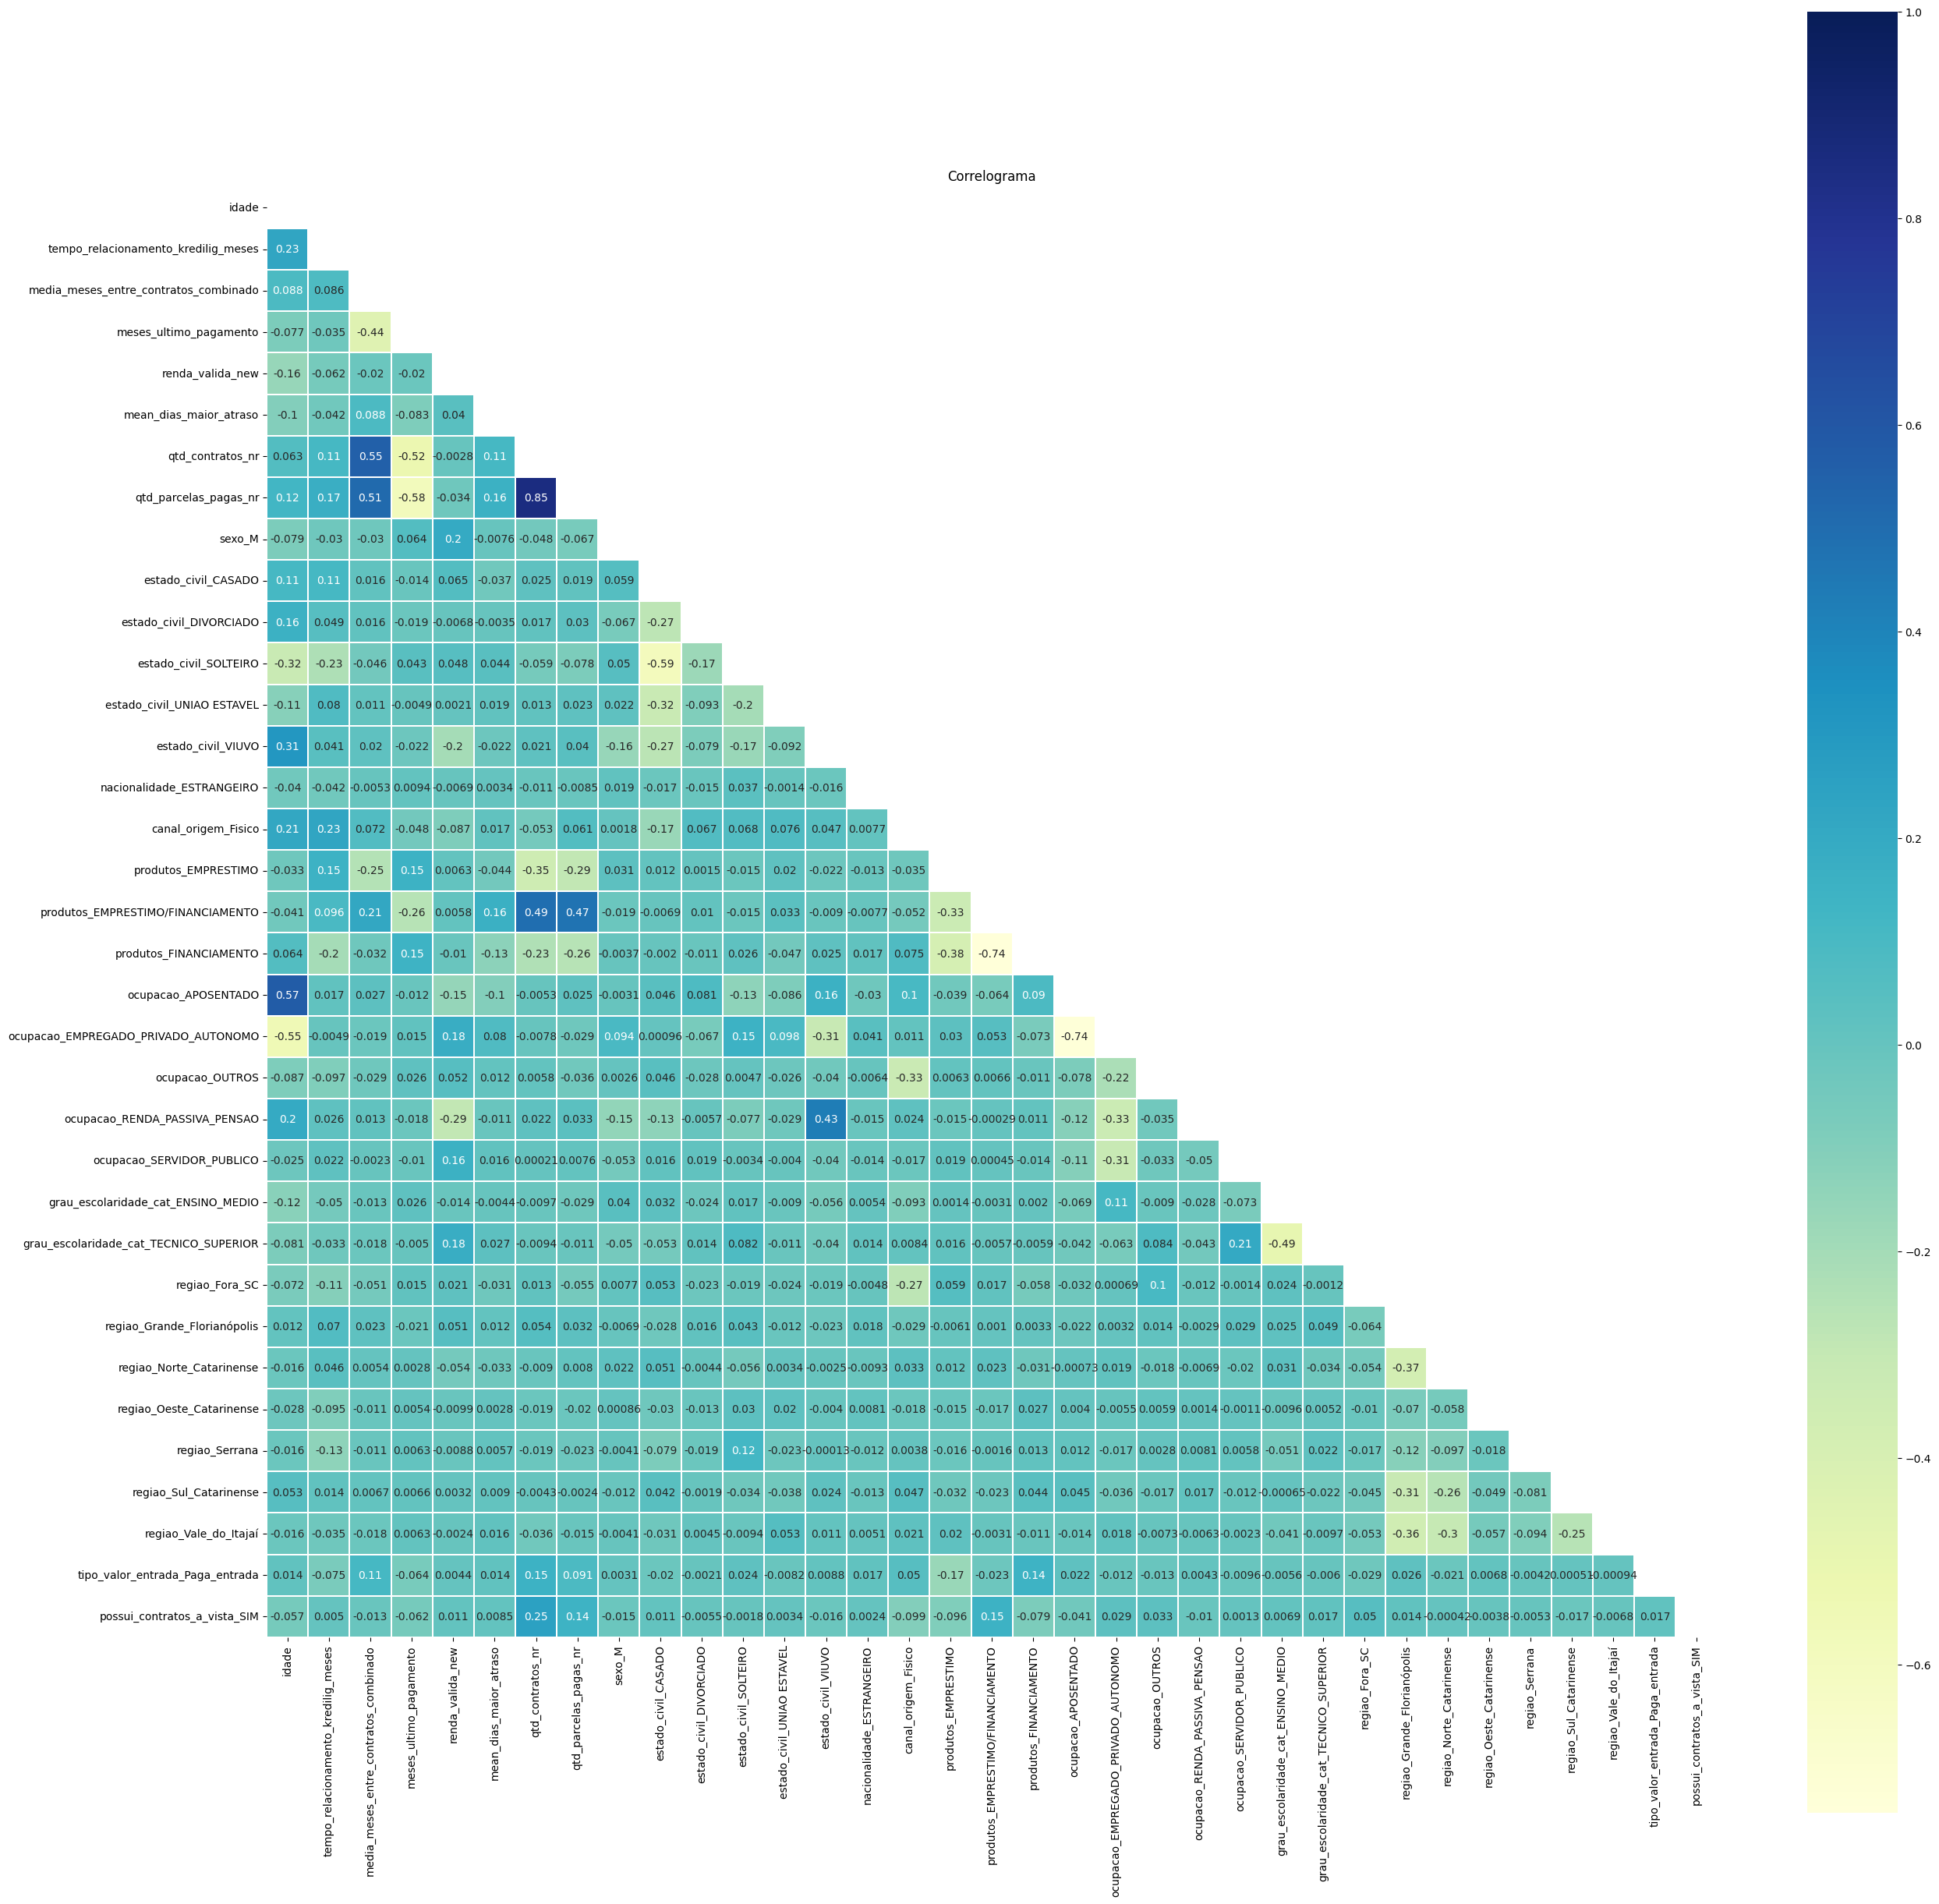

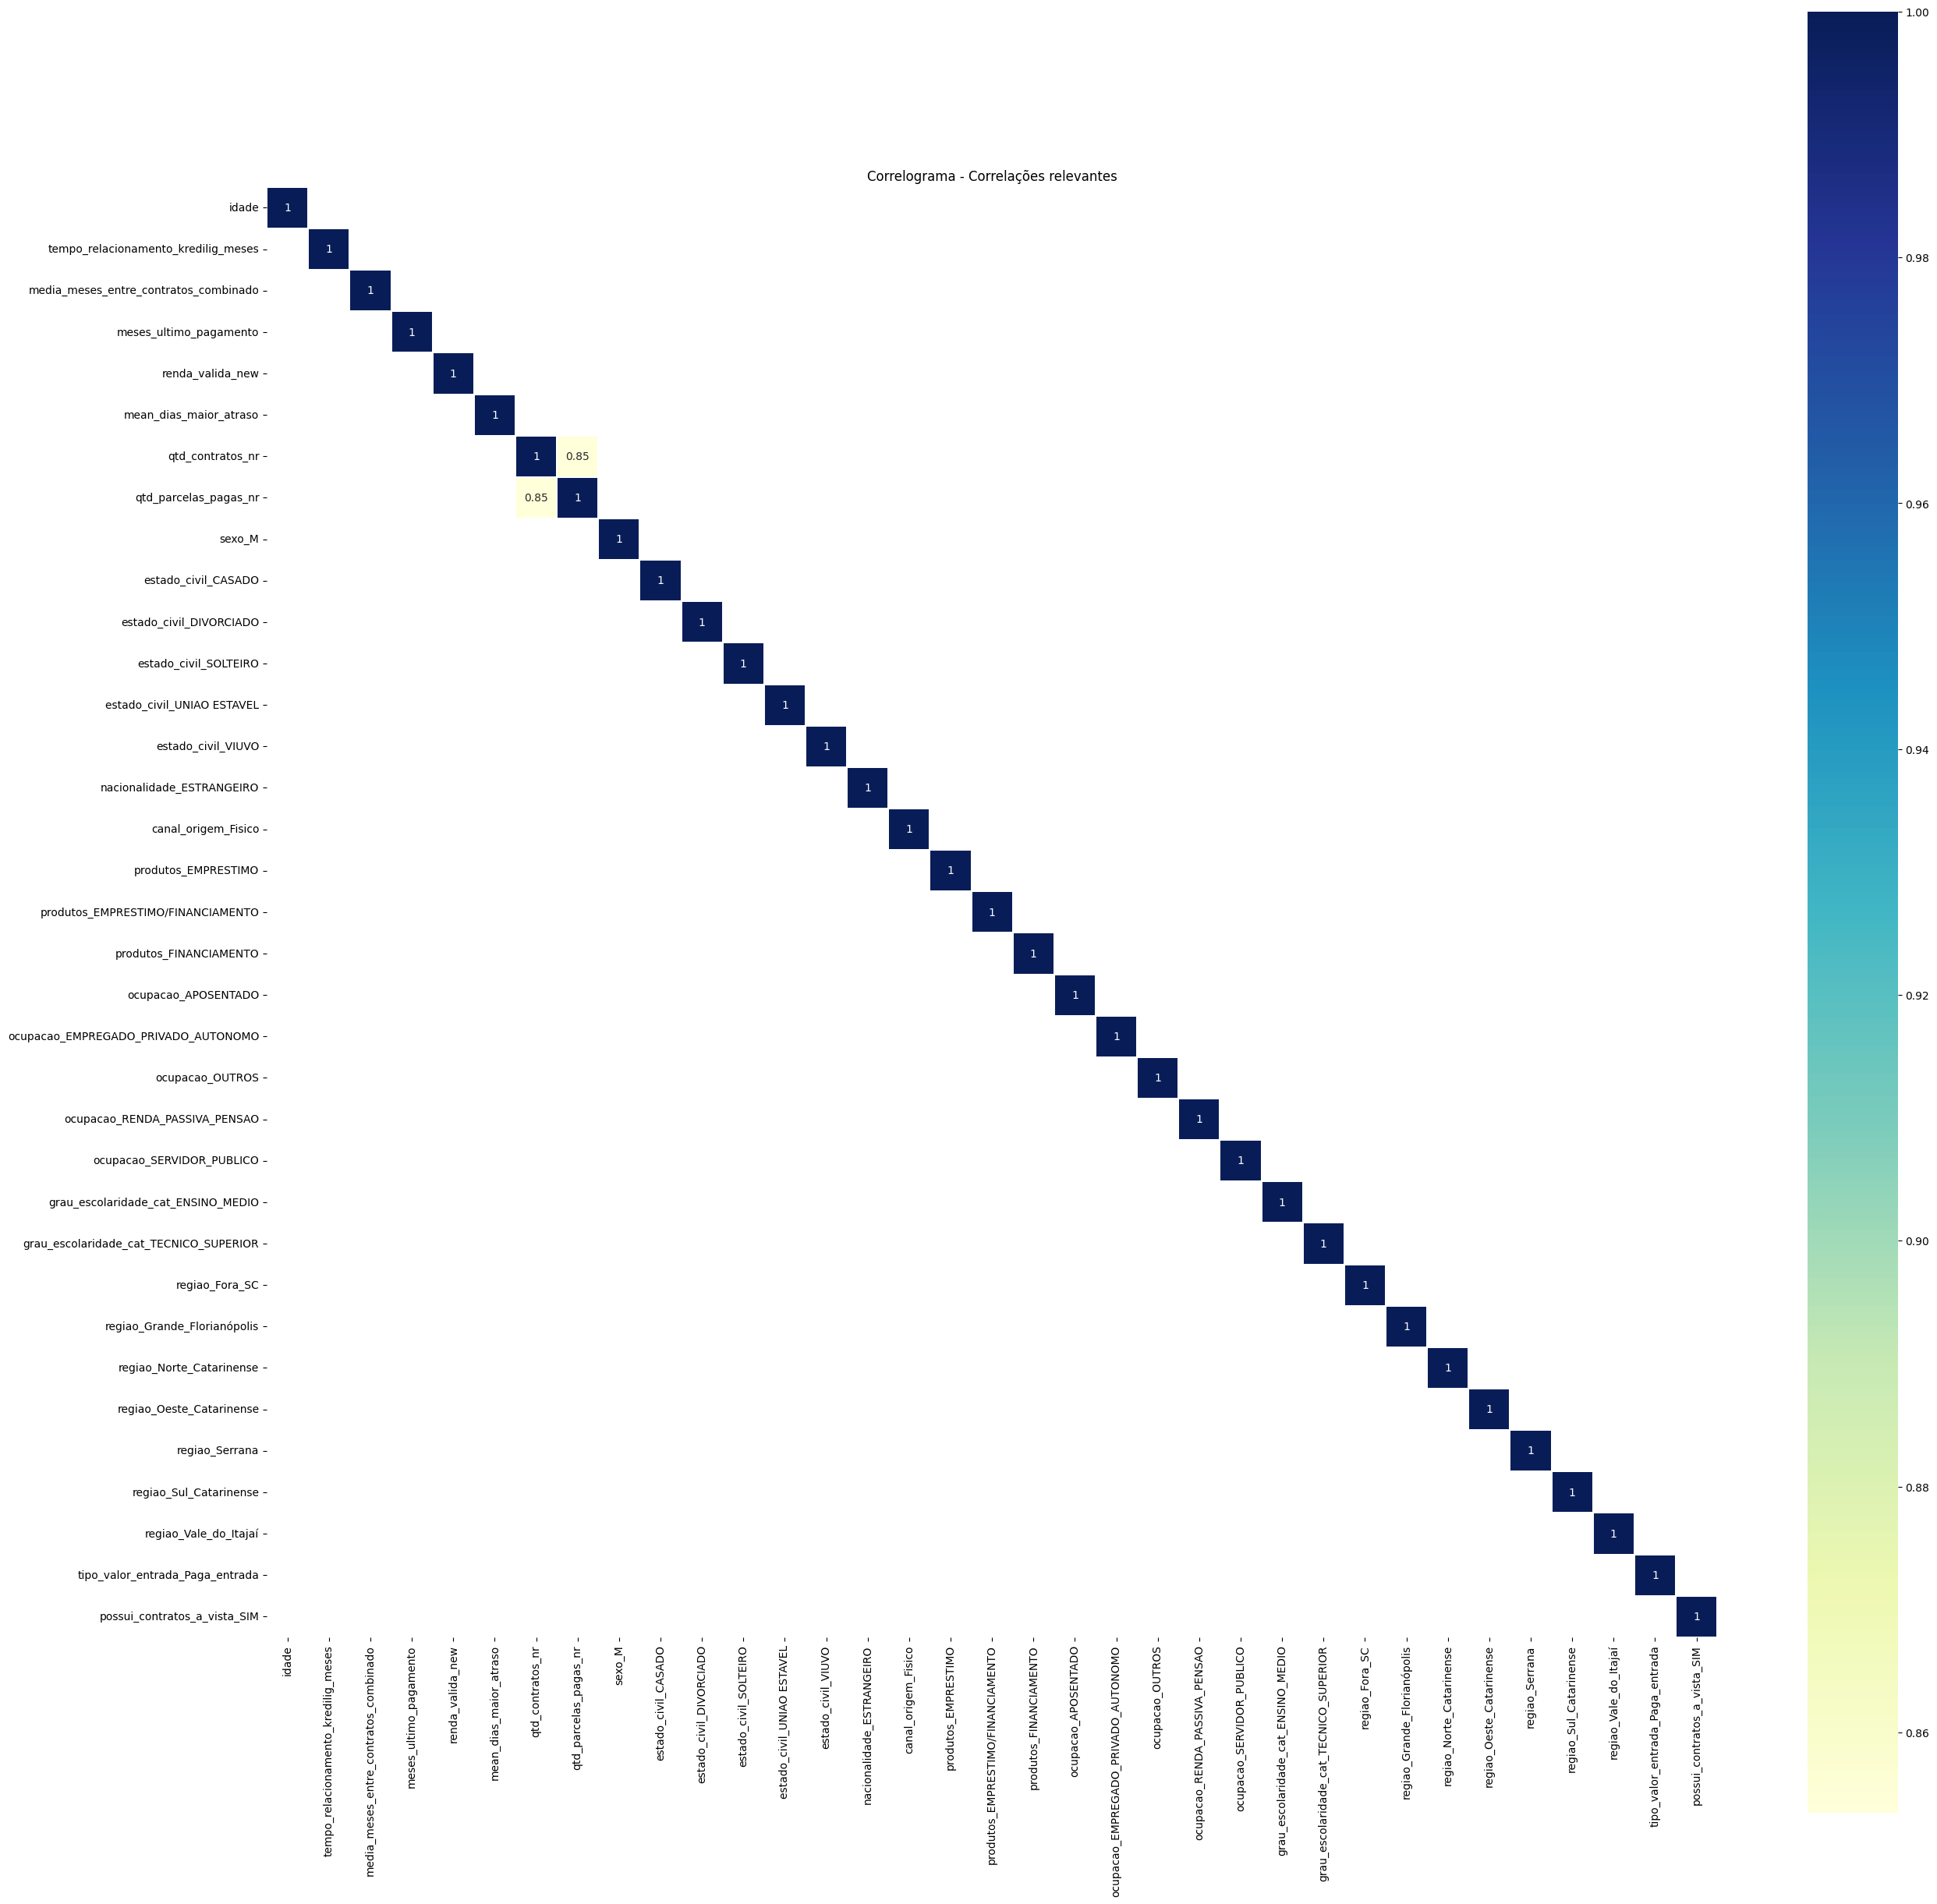

In [79]:
# Correlação entre covariáveis
# Pearson
corr=df_cluster_fit_d.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
w=h=30
plot.figure(figsize=(h,w))
sns.heatmap(corr,mask=mask,vmax=1.0,linewidths=0.01,
           square=True, annot=True,cmap='YlGnBu', linecolor='white')
plot.title('Correlograma')
plot.show

# Correlações relevantes
mask = np.abs(corr) >= 0.75
filtro_corr = corr.where(mask)

plot.figure(figsize=(h,w))
sns.heatmap(filtro_corr, vmax=1.0, linewidths=0.01,
            square=True, annot=True, cmap='YlGnBu', linecolor='white')
plot.title('Correlograma - Correlações relevantes')
plot.show()

# Cluster

In [80]:
## Padronização por distancia de cosseno
df_cluster_fit_standard=df_cluster_fit_d.div(df_cluster_fit_d.sum(axis=1),axis='rows')
df_cluster_fit_standard.sample(10)

,idade,tempo_relacionamento_kredilig_meses,media_meses_entre_contratos_combinado,meses_ultimo_pagamento,renda_valida_new,mean_dias_maior_atraso,qtd_contratos_nr,qtd_parcelas_pagas_nr,sexo_M,estado_civil_CASADO,estado_civil_DIVORCIADO,estado_civil_SOLTEIRO,estado_civil_UNIAO ESTAVEL,estado_civil_VIUVO,nacionalidade_ESTRANGEIRO,canal_origem_Fisico,produtos_EMPRESTIMO,produtos_EMPRESTIMO/FINANCIAMENTO,produtos_FINANCIAMENTO,ocupacao_APOSENTADO,ocupacao_EMPREGADO_PRIVADO_AUTONOMO,ocupacao_OUTROS,ocupacao_RENDA_PASSIVA_PENSAO,ocupacao_SERVIDOR_PUBLICO,grau_escolaridade_cat_ENSINO_MEDIO,grau_escolaridade_cat_TECNICO_SUPERIOR,regiao_Fora_SC,regiao_Grande_Florianópolis,regiao_Norte_Catarinense,regiao_Oeste_Catarinense,regiao_Serrana,regiao_Sul_Catarinense,regiao_Vale_do_Itajaí,tipo_valor_entrada_Paga_entrada,possui_contratos_a_vista_SIM
473249,0.01,0.03,0.00,0.01,0.93,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
151181,0.05,0.02,0.01,0.01,0.89,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
363511,0.03,0.02,0.00,0.01,0.92,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
369254,0.04,0.02,0.00,0.00,0.90,0.01,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
181288,0.01,0.03,0.00,0.01,0.94,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
446466,0.03,0.03,0.00,0.00,0.93,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
162,0.04,0.01,0.00,0.00,0.92,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
353085,0.03,0.02,0.00,0.01,0.93,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
284826,0.01,0.01,0.00,0.00,0.96,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
445994,0.02,0.02,0.00,0.02,0.94,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [81]:
df_int=df_cluster_fit_standard.copy()
df_cluster_fit_standard.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215311 entries, 73203 to 265316
Data columns (total 35 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   idade                                   215311 non-null  float64
 1   tempo_relacionamento_kredilig_meses     215311 non-null  float64
 2   media_meses_entre_contratos_combinado   215311 non-null  float64
 3   meses_ultimo_pagamento                  215311 non-null  float64
 4   renda_valida_new                        215311 non-null  float64
 5   mean_dias_maior_atraso                  215311 non-null  float64
 6   qtd_contratos_nr                        215311 non-null  float64
 7   qtd_parcelas_pagas_nr                   215311 non-null  float64
 8   sexo_M                                  215311 non-null  float64
 9   estado_civil_CASADO                     215311 non-null  float64
 10  estado_civil_DIVORCIADO                 21531

## Qtd de Grupo ideal

In [63]:
'''## Metodo elbow
################################
#Identificando a quantidade de clusters - 
elbow = []
K = range(2,21)
for k in K:
    print(k)
    kmeanElbow = KMeans(n_clusters = k , init='k-means++',n_init=50, max_iter=150, random_state =100).fit(df_cluster_fit_standard)
    elbow.append(kmeanElbow.inertia_)
    
################################# nesse caso poderia ser 7 ou 8 pois apartir do 6 o erro quadrático médio se torna menor e menos significativo
plot.figure(figsize=(16,8))
plot.plot(K, elbow, marker='o')
plot.xlabel('Nº Clusters', fontsize=16)
plot.xticks(range(2,16)) # ajustar range
plot.ylabel('WCSS', fontsize=16) # Soma dos Quadrados Dentro dos Clusters
plot.title('Método de Elbow', fontsize=16)
plot.show()'''

"## Metodo elbow\n################################\n#Identificando a quantidade de clusters - \nelbow = []\nK = range(2,21)\nfor k in K:\n    print(k)\n    kmeanElbow = KMeans(n_clusters = k , init='k-means++',n_init=50, max_iter=150, random_state =100).fit(df_cluster_fit_standard)\n    elbow.append(kmeanElbow.inertia_)\n\n################################# nesse caso poderia ser 7 ou 8 pois apartir do 6 o erro quadrático médio se torna menor e menos significativo\nplot.figure(figsize=(16,8))\nplot.plot(K, elbow, marker='o')\nplot.xlabel('Nº Clusters', fontsize=16)\nplot.xticks(range(2,16)) # ajustar range\nplot.ylabel('WCSS', fontsize=16) # Soma dos Quadrados Dentro dos Clusters\nplot.title('Método de Elbow', fontsize=16)\nplot.show()"

In [64]:
#elbow

In [65]:
'''def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)
    
    return distances.index(max(distances)) + 2'''

'def optimal_number_of_clusters(wcss):\n    x1, y1 = 2, wcss[0]\n    x2, y2 = 20, wcss[len(wcss)-1]\n\n    distances = []\n    for i in range(len(wcss)):\n        x0 = i+2\n        y0 = wcss[i]\n        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)\n        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)\n        distances.append(numerator/denominator)\n\n    return distances.index(max(distances)) + 2'

In [66]:
'''# calculando a quantidade ótima de clusters - número ótimo de clusters 5
n = optimal_number_of_clusters(elbow)
print(n)'''

'# calculando a quantidade ótima de clusters - número ótimo de clusters 5\nn = optimal_number_of_clusters(elbow)\nprint(n)'

## Kmeans

In [82]:
#################################
# Método K means
kmeans = KMeans(n_clusters = 5,init='k-means++',n_init=50, max_iter=150, random_state =100).fit(df_cluster_fit_standard)

#################################
print(kmeans.labels_)
print(kmeans)

[3 1 4 ... 1 2 4]
KMeans(max_iter=150, n_clusters=5, n_init=50, random_state=100)


In [83]:
# Salvando o modelo como um objeto pickle
joblib.dump(kmeans, "kmeans.pkl")

['kmeans.pkl']

# Interpretação dos grupos

In [84]:
# leitura do modelo como um objeto pickle
kmeans = joblib.load(r"kmeans.pkl")

In [85]:
kmeans.feature_names_in_

array(['idade', 'tempo_relacionamento_kredilig_meses',
       'media_meses_entre_contratos_combinado', 'meses_ultimo_pagamento',
       'renda_valida_new', 'mean_dias_maior_atraso', 'qtd_contratos_nr',
       'qtd_parcelas_pagas_nr', 'sexo_M', 'estado_civil_CASADO',
       'estado_civil_DIVORCIADO', 'estado_civil_SOLTEIRO',
       'estado_civil_UNIAO ESTAVEL', 'estado_civil_VIUVO',
       'nacionalidade_ESTRANGEIRO', 'canal_origem_Fisico',
       'produtos_EMPRESTIMO', 'produtos_EMPRESTIMO/FINANCIAMENTO',
       'produtos_FINANCIAMENTO', 'ocupacao_APOSENTADO',
       'ocupacao_EMPREGADO_PRIVADO_AUTONOMO', 'ocupacao_OUTROS',
       'ocupacao_RENDA_PASSIVA_PENSAO', 'ocupacao_SERVIDOR_PUBLICO',
       'grau_escolaridade_cat_ENSINO_MEDIO',
       'grau_escolaridade_cat_TECNICO_SUPERIOR', 'regiao_Fora_SC',
       'regiao_Grande_Florianópolis', 'regiao_Norte_Catarinense',
       'regiao_Oeste_Catarinense', 'regiao_Serrana',
       'regiao_Sul_Catarinense', 'regiao_Vale_do_Itajaí',
       'ti

In [86]:
#################################
## Rotualando os dados
labels = pd.DataFrame(data=kmeans.labels_)
#################################
df_cpf_obj.loc[:, 'Cluster'] = kmeans.labels_ # colocando os clusters na base de treino original

In [87]:
kmeans.labels_

array([3, 1, 4, ..., 1, 2, 4], dtype=int32)

In [88]:
### Checando a quantidade por cluster
df_cpf_obj.Cluster.value_counts(dropna=False)

Cluster
1    77366
3    62863
0    46438
4    24152
2     4492
Name: count, dtype: int64

In [89]:
df_cpf_obj.head(5)

,sexo,idade,estado_civil,nacionalidade,tempo_relacionamento_kredilig_meses,situacao_conta,canal_origem,situacao_fatura,limite_total,limite_total_utilizado,media_meses_entre_contratos_combinado,media_meses_entre_contratos_reneg,qtd_contratos_regular,FINANCIAMENTO,EMPRESTIMO,RENEG,qtd_contratos_aberto_regular,qtd_contratos_fechado_regular,qtd_reneg_aberto_regular,qtd_reneg_fechado_regular,valor_da_parcela_aberto,principal_total_aberto,principal_total_fechado,qtd_parcelas_pagas,qtd_parcelas_aberta,creditos_a_vencer,media_atraso_dias,inad,RENEG_aberto,meses_ultimo_pagamento,meses_entre_primeiro_e_ultimo_pagamento,meses_entre_primeiro_e_ultimo_fechamento,valor_pago_nr,valor_principal_total_nr,FIN_valor_medio_entrada_nr,id_base,produtos_ativos,dias_maior_atraso,renda_valida_new,renda_comprometida,amortizacao,produtos,qtd_total_fechado_a_vista,mean_dias_maior_atraso,qtd_contratos,limite_total_primeiro_mes,limite_total_ultimo_mes,situacao_alteracao_limite,REGIAO_NOVO,qtd_contratos_nr,qtd_cartao_antecipacao,qtd_parcelas_pagas_nr,categoria_relacionamento,ocupacao,grau_escolaridade_cat,regiao,tipo_cal_entre_contratos,tipo_cal_entre_contratos_reneg,tipo_valor_entrada,situacao_limite,situacao_parcela_aberto,mean_atraso_possui_info,possui_contratos_a_vista,possui_antecipacao,principal_total,cpf_cnpj,inad_e_reneg,fx_Idade,fx_Limite,fx_contratos_fechado_regular,fx_contratos_aberto_regular,fx_reneg_aberto_regular,fx_reneg_fechado_regular,fx_contratos_regular,fx_fechado_a_vista,fx_qtd_parcelas_pagas,fx_qtd_parcelas_abertas,fx_dias_media_atraso,fx_dias_maior_atraso,fx_mean_dias_maior_atraso60,fx_creditos_a_vencer,med_entre_contratos_comb,med_entre_contratos_reneg,fx_meses_ultimo_pagamento,fx_meses_entre_prim_ult_fech,fx_meses_entre_prim_ult_pag,fx_relacionamento_meses,fx_renda_valida,fx_renda_comprometida,fx_valor_pago_nr,fx_principal_total_nr,fx_principal_total_aberto,fx_principal_total_fechado,fx_principal_total,fx_amortizacao,fx_qtd_contratos,fx_ult_limite,fx_prim_limite,fx_qtd_cartao_antecipacao,fx_qtd_contratos_nr,fx_qtd_parcelas_pagas_nr,Cluster
73203,F,50,CASADO,BRASILEIRO,91.00,Cancelada,Fisico,L,0.00,0.00,0.00,1.20,2,1,1,1,0,0,0,2,0.00,0.00,1432.03,5,0,0.00,2.50,NAO,0,23.00,3.00,26.00,0.00,0.00,0.00,base_carne/base_cartao,NENHUM,5,6300.00,0.00,-1432.03,EMPRESTIMO/FINANCIAMENTO,0,2.40,2,6750.00,6750.00,Manteve,Norte Catarinense,0,1.00,0,Behavior,SERVIDOR_PUBLICO,TECNICO_SUPERIOR,Norte_Catarinense,Apenas_1_contrato,Contratos_dias_diferentes,N_Paga_entrada,N_possui_Limite,N_possui_parcela_aberto,SIM,NAO,SIM,1432.03,84335335920.00,0,"(45.0, 52.0]",Sem Limite,0,0,0,2 a 3,2 a 3,0,5,0,3,4 a 7,3,0,0,2,19 a 24,3 anos,3,8 anos,Acima de 3 SM,0,0,0,0,R$1 mil a R$2 mil,"R$1 mil a R$2,5 mil",Negativo,2,"R$5 mil a R$7,5 mil","R$5 mil a R$7,5 mil",1,0,0,3
530133,F,59,SOLTEIRO,BRASILEIRO,19.00,Ativa,Fisico,VAZIO,1890.00,0.00,0.00,0.00,1,1,0,0,0,1,0,0,0.00,0.00,901.13,10,0,0.00,11.00,NAO,0,9.00,10.00,19.00,999.65,901.13,0.00,base_carne,NENHUM,11,1730.00,0.00,999.65,FINANCIAMENTO,0,6.95,1,1000.00,1890.00,Aumentou,Norte Catarinense,1,0.00,10,Behavior,EMPREGADO_PRIVADO_AUTONOMO,ENSINO_MEDIO,Norte_Catarinense,Apenas_1_contrato,Apenas_1_contrato,N_Paga_entrada,Possui_Limite,N_possui_parcela_aberto,SIM,N_base_CARTAO,NAO,901.13,2437977961.00,0,"(58.0, 63.0]",R$1 mil a R$5 mil,1,0,0,0,1,0,10,0,8 a 15,8 a 15,7,0,0,0,9,19 a 24,10,19 a 24,"De 1 SM a 1,25 SM",0,Até R$2 mil,Até R$2 mil,0,Até R$1 mil,Até R$1 mil,Até R$2 mil,1,"R$1 mil a R$2,5 mil",Até R$1 mil,0,1,10,1
298257,F,71,CASADO,BRASILEIRO,99.00,Bloqueada,Fisico,A,0.00,0.00,1.75,0.00,4,1,1,1,0,3,0,1,1681.30,20074.65,4592.64,71,128,3511.55,58.25,SIM,0,21.00,17.00,38.00,15072.70,24422.77,0.00,base_carne/base_cartao,EMPRESTIMO/FINANCIAMENTO,591,1412.00,119.07,14828.18,EMPRESTIMO/FINANCIAMENTO,0,1.86,12,23100.00,25410.00,Aumentou,Sul Catarinense,11,0.00,70,Behavior,RENDA_PASSIVA_PENSAO,ENSINO_MEDIO,Sul_Catarinense,Contratos_dias_diferentes,Apenas_1_contrato,N_Paga_entrada,N_possui_Limite,Possui_parcela_aberto,SIM,

In [90]:
### Checando a quantidade Cluster por inad_reneg
pd.crosstab(df_cpf_obj["inad_e_reneg"], df_cpf_obj["Cluster"])

Cluster,0,1,2,3,4
inad_e_reneg,,,,,
0,35221,53345,2959,41933,17216
1,11217,24021,1533,20930,6936


In [91]:
df_cpf_obj.info()

<class 'pandas.core.frame.DataFrame'>
Index: 215311 entries, 73203 to 265316
Columns: 102 entries, sexo to Cluster
dtypes: category(54), float64(25), int32(1), int64(18), object(4)
memory usage: 98.8+ MB


In [77]:
'''df_cluster_csv=df_cpf_obj[["cpf_cnpj","Cluster"]]
df_cluster_csv.to_csv('cluster.csv', index=False)'''

'df_cluster_csv=df_cpf_obj[["cpf_cnpj","Cluster"]]\ndf_cluster_csv.to_csv(\'cluster.csv\', index=False)'

### EDA cluster

In [92]:
df_cpf_obj.columns.to_list()

['sexo',
 'idade',
 'estado_civil',
 'nacionalidade',
 'tempo_relacionamento_kredilig_meses',
 'situacao_conta',
 'canal_origem',
 'situacao_fatura',
 'limite_total',
 'limite_total_utilizado',
 'media_meses_entre_contratos_combinado',
 'media_meses_entre_contratos_reneg',
 'qtd_contratos_regular',
 'FINANCIAMENTO',
 'EMPRESTIMO',
 'RENEG',
 'qtd_contratos_aberto_regular',
 'qtd_contratos_fechado_regular',
 'qtd_reneg_aberto_regular',
 'qtd_reneg_fechado_regular',
 'valor_da_parcela_aberto',
 'principal_total_aberto',
 'principal_total_fechado',
 'qtd_parcelas_pagas',
 'qtd_parcelas_aberta',
 'creditos_a_vencer',
 'media_atraso_dias',
 'inad',
 'RENEG_aberto',
 'meses_ultimo_pagamento',
 'meses_entre_primeiro_e_ultimo_pagamento',
 'meses_entre_primeiro_e_ultimo_fechamento',
 'valor_pago_nr',
 'valor_principal_total_nr',
 'FIN_valor_medio_entrada_nr',
 'id_base',
 'produtos_ativos',
 'dias_maior_atraso',
 'renda_valida_new',
 'renda_comprometida',
 'amortizacao',
 'produtos',
 'qtd_tota

In [93]:
#%pip install xlsxwriter

tabelas_de_contingencia = {}

variavel_alvo = 'Cluster'

# Selecionando apenas colunas categóricas
colunas_categoricas = [
 'sexo',
 'estado_civil',
 'nacionalidade',
 'situacao_conta',
 'canal_origem',
 'situacao_fatura',
 'FINANCIAMENTO',
 'EMPRESTIMO',
 'RENEG',
 'inad',
 'RENEG_aberto',
 'id_base',
 'produtos_ativos',
 'produtos',
 'grau_escolaridade_cat',
 'ocupacao',
 'tipo_cal_entre_contratos',
 'tipo_cal_entre_contratos_reneg',
 'tipo_valor_entrada',
 'situacao_limite',
 'situacao_parcela_aberto',
 'mean_atraso_possui_info',
 "possui_contratos_a_vista",
 "categoria_relacionamento",
 "situacao_alteracao_limite",
 "regiao",
 'inad_e_reneg',
 'fx_Idade',
 'fx_Limite',
 'fx_contratos_fechado_regular',
 'fx_contratos_aberto_regular',
 'fx_reneg_aberto_regular',
 'fx_reneg_fechado_regular',
 'fx_contratos_regular',
 'fx_fechado_a_vista',
 'fx_qtd_parcelas_pagas',
 'fx_qtd_parcelas_abertas',
 'fx_dias_media_atraso',
 'fx_dias_maior_atraso',
 'fx_mean_dias_maior_atraso60',
 'fx_creditos_a_vencer',
 'med_entre_contratos_comb',
 'med_entre_contratos_reneg',
 'fx_meses_ultimo_pagamento',
 'fx_meses_entre_prim_ult_fech',
 'fx_relacionamento_meses',
 'fx_renda_valida',
 'fx_renda_comprometida',
 'fx_valor_pago_nr',
 'fx_principal_total_nr',
 'fx_principal_total_aberto',
 'fx_principal_total_fechado',
 "fx_principal_total",
 'fx_amortizacao',
 "fx_qtd_contratos",
 "fx_ult_limite",
 "fx_prim_limite",
 "fx_meses_entre_prim_ult_pag",
 'fx_qtd_contratos_nr',
 "fx_qtd_cartao_antecipacao",
 'fx_qtd_parcelas_pagas_nr']

# Criando tabelas de contingência para cada variável categórica
for col in colunas_categoricas:
    print(f"\nTabela de Contingência: {col} x {variavel_alvo}")
    tabela =pd.crosstab(df_cpf_obj[col], df_cpf_obj[variavel_alvo],dropna=False)
    tabelas_de_contingencia[col]=tabela
    print(tabela)

#Criando um nome de arquivo
nome_arquivo = f"tabelas_clusterNOVO.xlsx"

# Salvando no Excel - cada variável em uma planilha
#"Interpretação CLUSTER.xlsx"
with pd.ExcelWriter(nome_arquivo, engine="xlsxwriter") as writer:
    for col, tabela in tabelas_de_contingencia.items():
        tabela.to_excel(writer, sheet_name=col)


Tabela de Contingência: sexo x Cluster
Cluster      0      1     2      3      4
sexo                                     
F        28796  41607  3120  29368  15790
M        17642  35759  1372  33495   8362

Tabela de Contingência: estado_civil x Cluster
Cluster            0      1     2      3      4
estado_civil                                   
CASADO         24795  37321  2086  27452  12142
DIVORCIADO      4457   5712   492   3208   2203
SOLTEIRO        6821  21971   601  25661   3889
UNIAO ESTAVEL   4708   7889   516   5189   2690
VIUVO           5657   4473   797   1353   3228

Tabela de Contingência: nacionalidade x Cluster
Cluster            0      1     2      3      4
nacionalidade                                  
BRASILEIRO     46313  76866  4484  62336  24075
ESTRANGEIRO      125    500     8    527     77

Tabela de Contingência: situacao_conta x Cluster
Cluster             0      1     2      3      4
situacao_conta                                  
Ativa           296

## Salvar dados de treino

In [94]:
df_leakage_X_train.loc[:, 'Cluster'] = kmeans.labels_

In [95]:
df_leakage_X_train.produtos.value_counts()

produtos
FINANCIAMENTO               99499
EMPRESTIMO/FINANCIAMENTO    84311
EMPRESTIMO                  31501
NENHUM                          0
Name: count, dtype: int64

In [96]:
df_leakage_X_train.produtos.value_counts(normalize=True)

produtos
FINANCIAMENTO              0.46
EMPRESTIMO/FINANCIAMENTO   0.39
EMPRESTIMO                 0.15
NENHUM                     0.00
Name: proportion, dtype: float64

In [97]:
df_leakage_X_train.to_csv('df_train.csv', index=False)

## Salvar dados de teste

### Base teste - Imputação por grupos

In [98]:
## Pré processamento - Imputação utiliza transform
X_test["sexo"] = X_test["sexo"].str.strip().replace("", np.nan).astype("category")

## Imputação moda por grupo

# Criar Series com os valores imputados
valores_grau_escolaridade_cat_test = X_test["natureza_ocupacao"].map(moda_grau_escolaridade_cat)
valores_estado_civil_test  = X_test["natureza_ocupacao"].map(moda_estado_civil)

# Imputar manualmente com .loc[]
X_test.loc[X_test["grau_escolaridade_cat"].isna(), "grau_escolaridade_cat"] = valores_grau_escolaridade_cat_test[X_test["grau_escolaridade_cat"].isna()]
X_test.loc[X_test["estado_civil"].isna(), "estado_civil"] = valores_estado_civil_test[X_test["estado_civil"].isna()]

## Imputação categórica moda geral
X_test[var_null_cat] = X_test[var_null_cat].replace({None: np.nan})

X_test[var_null_cat] = pd.DataFrame(
    imputer_cat.transform(X_test[var_null_cat]),
    columns=var_null_cat,
    index=X_test.index)

## Imputação numérica por grupo

# Criar Series com os valores imputados
valores_imputados_valida_test = X_test["natureza_ocupacao"].map(medias_renda_valida)
valores_imputados_comprometida_test = X_test["natureza_ocupacao"].map(medias_renda_comprometida)
valores_imputados_ultimo_mes_test = X_test["fx_score"].map(medianas_renda_limite_total_ultimo_mes)
valores_imputados_primeiro_mes_test = X_test["fx_score"].map(medianas_renda_limite_total_primeiro_mes)

# tipos
valores_imputados_valida_test=valores_imputados_valida_test.astype(float)
valores_imputados_comprometida_test=valores_imputados_comprometida_test.astype(float)
valores_imputados_ultimo_mes_test=valores_imputados_ultimo_mes_test.astype(float)
valores_imputados_primeiro_mes_test=valores_imputados_primeiro_mes_test.astype(float)

# Imputar manualmente com .loc[]
X_test.loc[X_test["renda_valida_new"].isna(), "renda_valida_new"] = valores_imputados_valida_test[X_test["renda_valida_new"].isna()]
X_test.loc[X_test["renda_comprometida"].isna(), "renda_comprometida"] = valores_imputados_comprometida_test[X_test["renda_comprometida"].isna()]
X_test.loc[X_test["limite_total_ultimo_mes"].isna(), "limite_total_ultimo_mes"] = valores_imputados_valida_test[X_test["limite_total_ultimo_mes"].isna()]
X_test.loc[X_test["limite_total_primeiro_mes"].isna(), "limite_total_primeiro_mes"] = valores_imputados_comprometida_test[X_test["limite_total_primeiro_mes"].isna()]

## Imputação numérica média geral
X_test[var_null_num] = X_test[var_null_num].replace({None: np.nan})

X_test[var_null_num] = pd.DataFrame(
    imputer_num.transform(X_test[var_null_num]),
    columns=var_null_num,
    index=X_test.index)


## Imputação numérica mediana geral

X_test[var_null_num_median] = X_test[var_null_num_median].replace({None: np.nan})

X_test[var_null_num_median] = pd.DataFrame(
    imputer_num_median.transform(X_test[var_null_num_median]),
    columns=var_null_num_median,
    index=X_test.index)

X_test.drop(columns=["natureza_ocupacao","fx_score"], inplace=True)

In [99]:
# conferindo imputação
colunas_categoricas = [
"sexo",
"estado_civil",
"grau_escolaridade_cat",
"nacionalidade",]

# Criando tabelas de contingência para cada variável categórica
for col in colunas_categoricas:
    print(f"\nTabela de Frequência: {col}")
    tabela=X_test[col].value_counts(dropna=False)
    print(tabela)
    
# Porcentagem de valores faltantes
(X_test.isnull().sum()).sort_values(ascending=False)


Tabela de Frequência: sexo
sexo
F    50883
M    41394
Name: count, dtype: int64

Tabela de Frequência: estado_civil
estado_civil
CASADO           44228
SOLTEIRO         25342
UNIAO ESTAVEL     9081
DIVORCIADO        6957
VIUVO             6669
Name: count, dtype: int64

Tabela de Frequência: grau_escolaridade_cat
grau_escolaridade_cat
ENSINO_MEDIO        72686
ATE_FUNDAMENTAL     13955
TECNICO_SUPERIOR     5636
Name: count, dtype: int64

Tabela de Frequência: nacionalidade
nacionalidade
BRASILEIRO     91763
ESTRANGEIRO      514
Name: count, dtype: int64


sexo                                   0
idade                                  0
estado_civil                           0
nacionalidade                          0
tempo_relacionamento_kredilig_meses    0
                                      ..
situacao_parcela_aberto                0
mean_atraso_possui_info                0
possui_contratos_a_vista               0
possui_antecipacao                     0
principal_total                        0
Length: 65, dtype: int64

In [100]:
X_test["situacao_alteracao_limite"] = np.select(
    [
        X_test["limite_total_primeiro_mes"] > X_test["limite_total_ultimo_mes"],   
        X_test["limite_total_primeiro_mes"] < X_test["limite_total_ultimo_mes"],   
        X_test["limite_total_primeiro_mes"] == X_test["limite_total_ultimo_mes"]  
    ],
    [
        "Diminuiu",    
        "Aumentou",      
        "Manteve"       
    ],
    default="Indefinido"
)
X_test["situacao_alteracao_limite"]=X_test["situacao_alteracao_limite"].astype("category")

In [101]:
X_test.situacao_alteracao_limite.value_counts(dropna=False)

situacao_alteracao_limite
Aumentou    46159
Manteve     34500
Diminuiu    11618
Name: count, dtype: int64

In [102]:
df_cpf_obj_test=X_test.copy()
df_cpf_obj_test["cpf_cnpj"]=ids_test
df_cpf_obj_test["inad_e_reneg"]=y_test["inad_e_reneg"]

In [103]:
# excluindo colunas que são vazamento
# Seleção de variáveis
df_leakage_X_test = df_cpf_obj_test.reindex(columns=df_leakage_X_train.columns, fill_value=0)

In [106]:
# one hot encoding 
X_test_dummy = pd.get_dummies(df_leakage_X_test).astype(int)
# Recupera as colunas usadas no treino
colunas_treinamento = kmeans.feature_names_in_
X_test_dummy = X_test_dummy.reindex(columns=colunas_treinamento, fill_value=0)

In [107]:
## Padronização por distancia de cosseno
X_test_dummy_cos=X_test_dummy.div(X_test_dummy.sum(axis=1),axis='rows')

In [108]:
X_test_dummy_cos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92277 entries, 33027 to 248035
Data columns (total 35 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   idade                                   92277 non-null  float64
 1   tempo_relacionamento_kredilig_meses     92277 non-null  float64
 2   media_meses_entre_contratos_combinado   92277 non-null  float64
 3   meses_ultimo_pagamento                  92277 non-null  float64
 4   renda_valida_new                        92277 non-null  float64
 5   mean_dias_maior_atraso                  92277 non-null  float64
 6   qtd_contratos_nr                        92277 non-null  float64
 7   qtd_parcelas_pagas_nr                   92277 non-null  float64
 8   sexo_M                                  92277 non-null  float64
 9   estado_civil_CASADO                     92277 non-null  float64
 10  estado_civil_DIVORCIADO                 92277 non-null  fl

In [109]:
cluster_test = kmeans.predict(X_test_dummy_cos) # aplicando o modelo na base de teste processada

In [110]:
X_test_dummy_cos.columns

Index(['idade', 'tempo_relacionamento_kredilig_meses',
       'media_meses_entre_contratos_combinado', 'meses_ultimo_pagamento',
       'renda_valida_new', 'mean_dias_maior_atraso', 'qtd_contratos_nr',
       'qtd_parcelas_pagas_nr', 'sexo_M', 'estado_civil_CASADO',
       'estado_civil_DIVORCIADO', 'estado_civil_SOLTEIRO',
       'estado_civil_UNIAO ESTAVEL', 'estado_civil_VIUVO',
       'nacionalidade_ESTRANGEIRO', 'canal_origem_Fisico',
       'produtos_EMPRESTIMO', 'produtos_EMPRESTIMO/FINANCIAMENTO',
       'produtos_FINANCIAMENTO', 'ocupacao_APOSENTADO',
       'ocupacao_EMPREGADO_PRIVADO_AUTONOMO', 'ocupacao_OUTROS',
       'ocupacao_RENDA_PASSIVA_PENSAO', 'ocupacao_SERVIDOR_PUBLICO',
       'grau_escolaridade_cat_ENSINO_MEDIO',
       'grau_escolaridade_cat_TECNICO_SUPERIOR', 'regiao_Fora_SC',
       'regiao_Grande_Florianópolis', 'regiao_Norte_Catarinense',
       'regiao_Oeste_Catarinense', 'regiao_Serrana', 'regiao_Sul_Catarinense',
       'regiao_Vale_do_Itajaí', 'tipo_valo

In [111]:
cluster_test

array([1, 0, 0, ..., 1, 4, 1], dtype=int32)

In [112]:
df_leakage_X_test.loc[:, 'Cluster'] = cluster_test

In [113]:
df_leakage_X_test.produtos.value_counts(normalize=True)

produtos
FINANCIAMENTO              0.47
EMPRESTIMO/FINANCIAMENTO   0.39
EMPRESTIMO                 0.14
NENHUM                     0.00
Name: proportion, dtype: float64

In [114]:
pd.crosstab(df_leakage_X_test["produtos"],df_leakage_X_test["inad_e_reneg"])

inad_e_reneg,0,1
produtos,,
EMPRESTIMO,6657,6706
EMPRESTIMO/FINANCIAMENTO,22120,13723
FINANCIAMENTO,35911,7160


In [115]:
df_leakage_X_test.to_csv('df_test.csv', index=False)